In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image,display

In [4]:
!nvidia-smi


Thu Sep  5 11:01:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
HOME=os.getcwd()

In [6]:
print(HOME)

/content


In [7]:
!pip install ultralytics==8.0.0

In [8]:
import ultralytics

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/201.2 GB disk)


In [10]:
!mkdir {HOME}/datasets

In [11]:
!pwd

/content


In [12]:
%cd {HOME}/datasets

/content/datasets


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BD8qhiD3TNKZDqxzeptN")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:00<00:00, 6960.76it/s]


In [14]:
%cd {HOME}

/content


In [15]:
%cd {dataset.location}

/content/datasets/EEP_Detection-1


In [18]:
import os
os.environ['HYDRA_FULL_ERROR'] = '1'

%cd {HOME}


!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/EEP_Detection/data.yaml epochs=90 imgsz=640

Streaming output truncated to the last 5000 lines.
      74/90      8.66G     0.8993     0.5481      1.201        126        640:   3% 4/142 [00:04<01:51,  1.23it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      74/90      8.66G     0.8835     0.5473      1.191        103        640:   4% 5/142 [00:04<01:37,  1.40it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      74/90      8.66G     0.8854      0.547      1.195         85        640:   4% 6/142 [00:05<01:30,  1.50it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:290: FutureWarning: `torch.cuda.amp.autoca

In [19]:
!ls {HOME}/runs/detect/train

args.yaml					    results.csv		  val_batch0_labels.jpg
confusion_matrix.png				    results.png		  val_batch0_pred.jpg
events.out.tfevents.1725534701.0598c9ad055e.3868.0  train_batch0.jpg	  val_batch1_labels.jpg
F1_curve.png					    train_batch11360.jpg  val_batch1_pred.jpg
P_curve.png					    train_batch11361.jpg  val_batch2_labels.jpg
PR_curve.png					    train_batch11362.jpg  val_batch2_pred.jpg
predictions.json				    train_batch1.jpg	  weights
R_curve.png					    train_batch2.jpg


/content


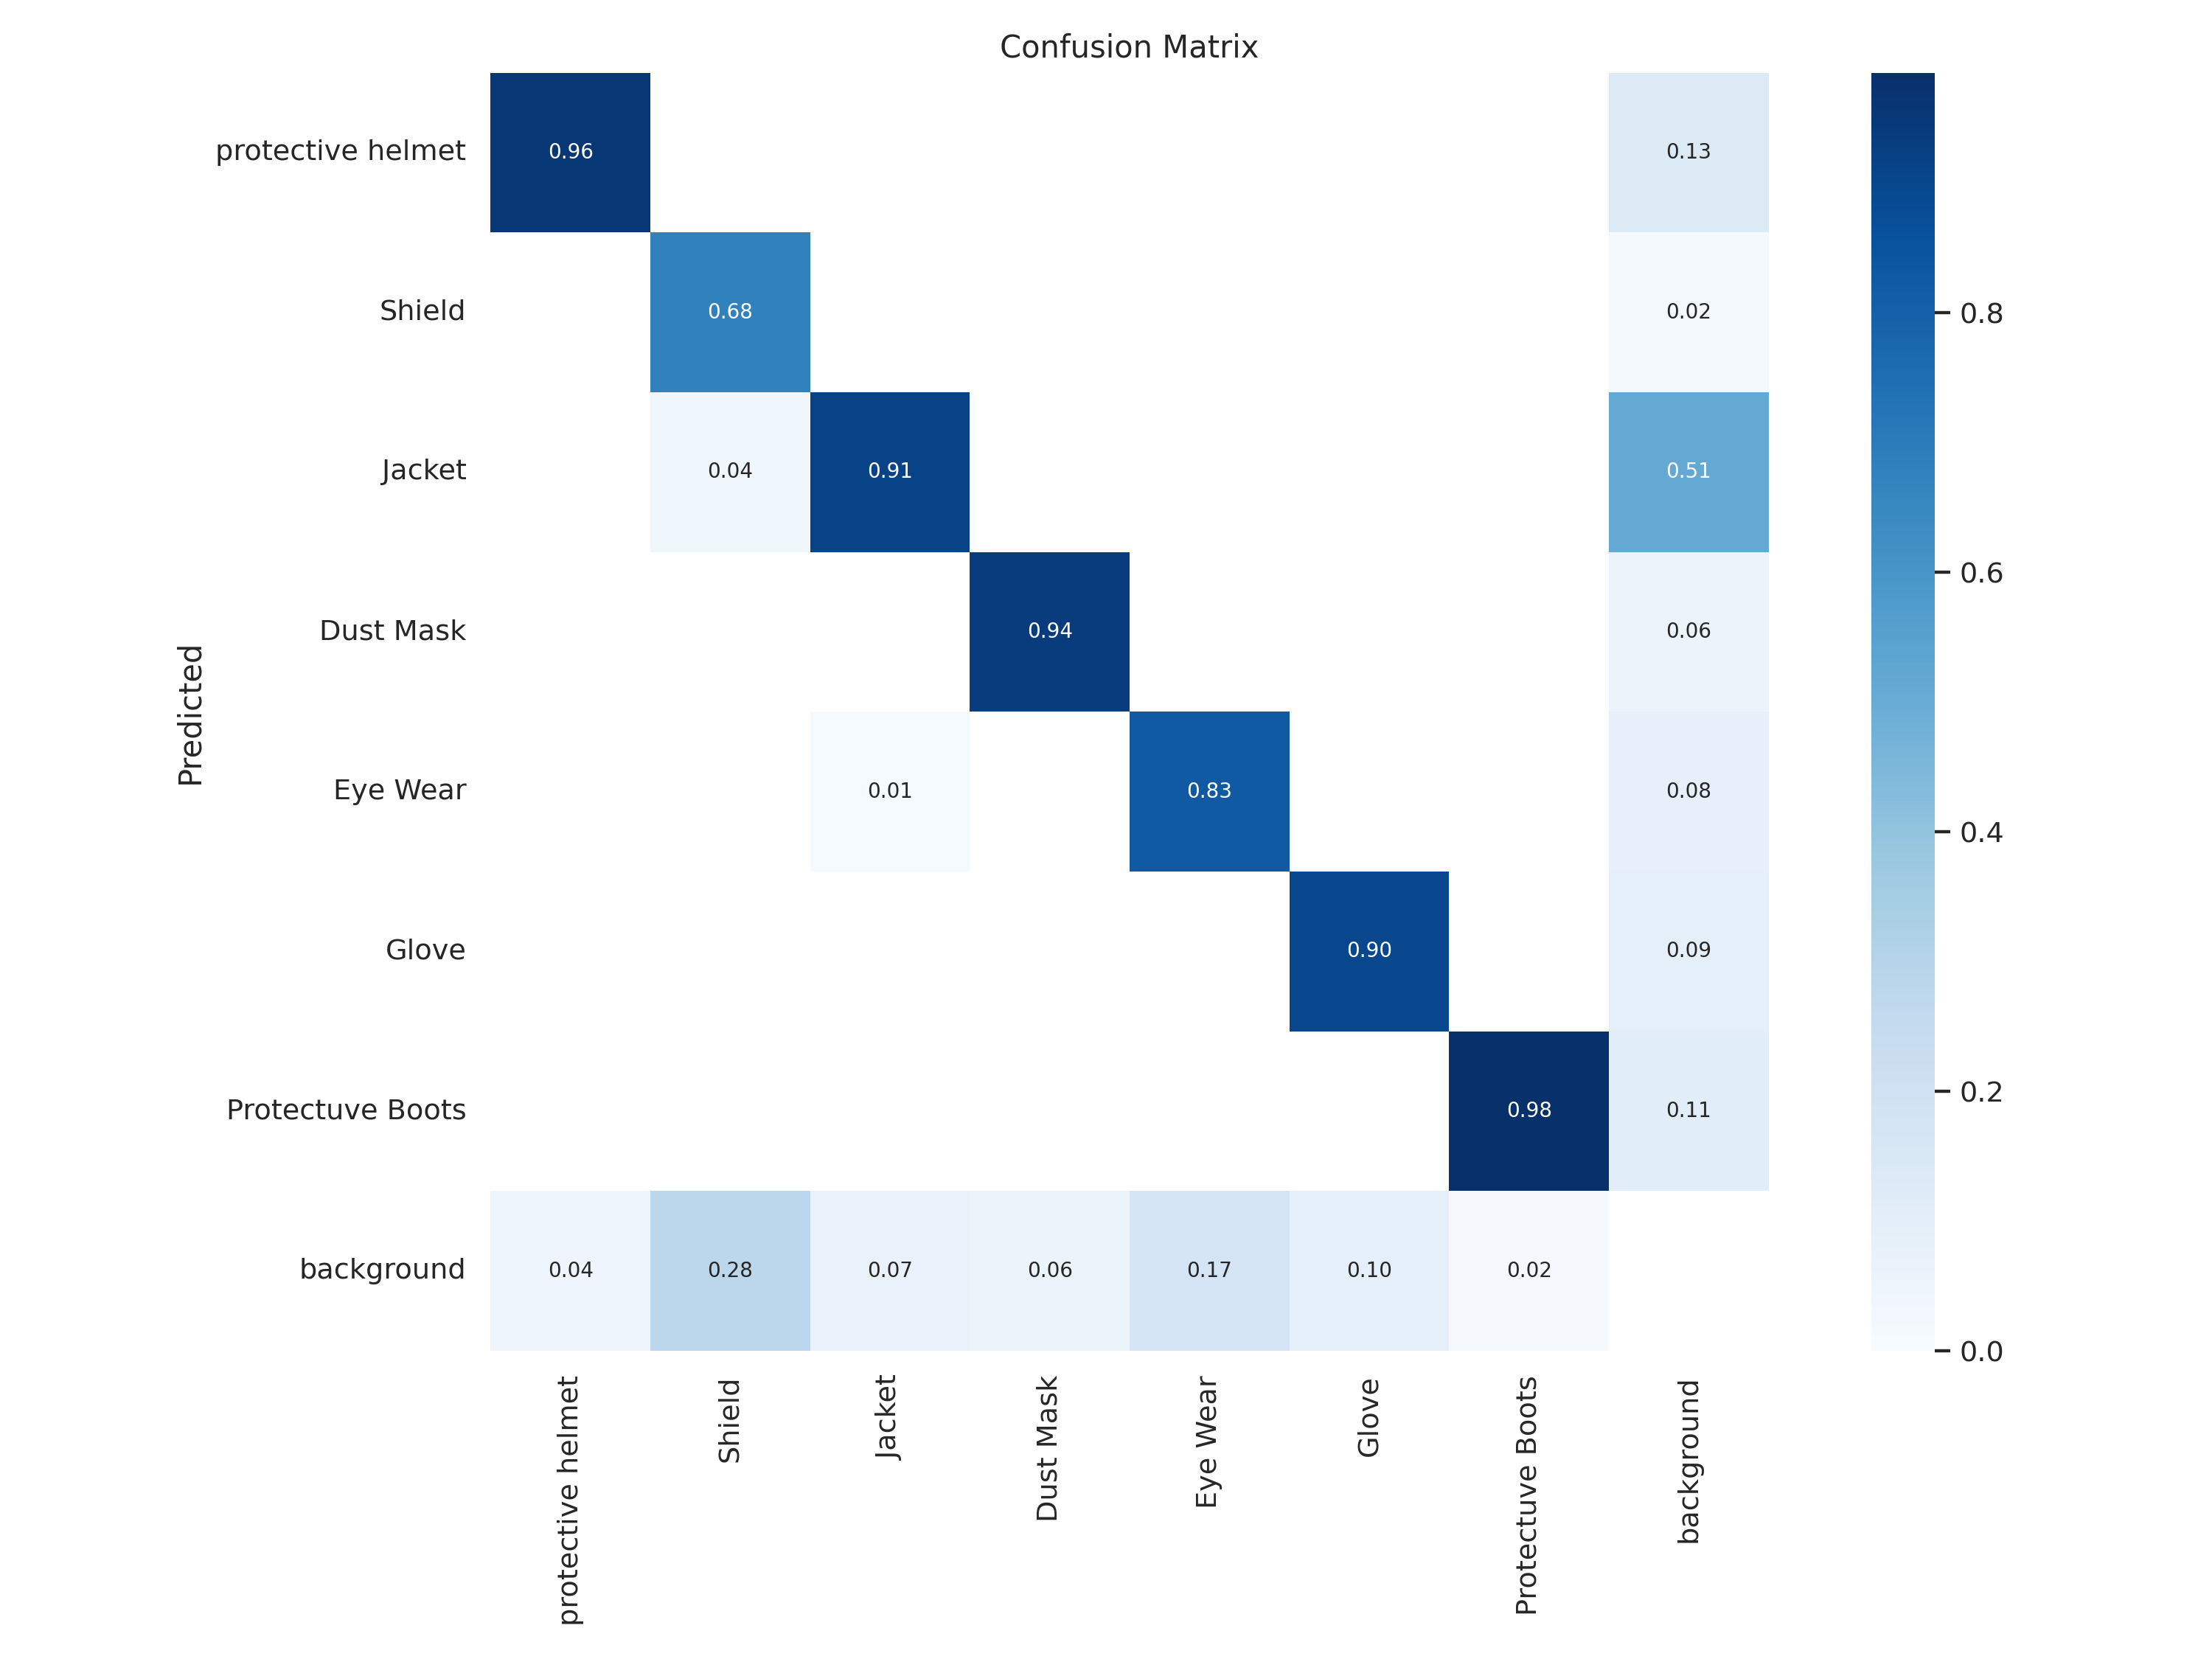

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

/content


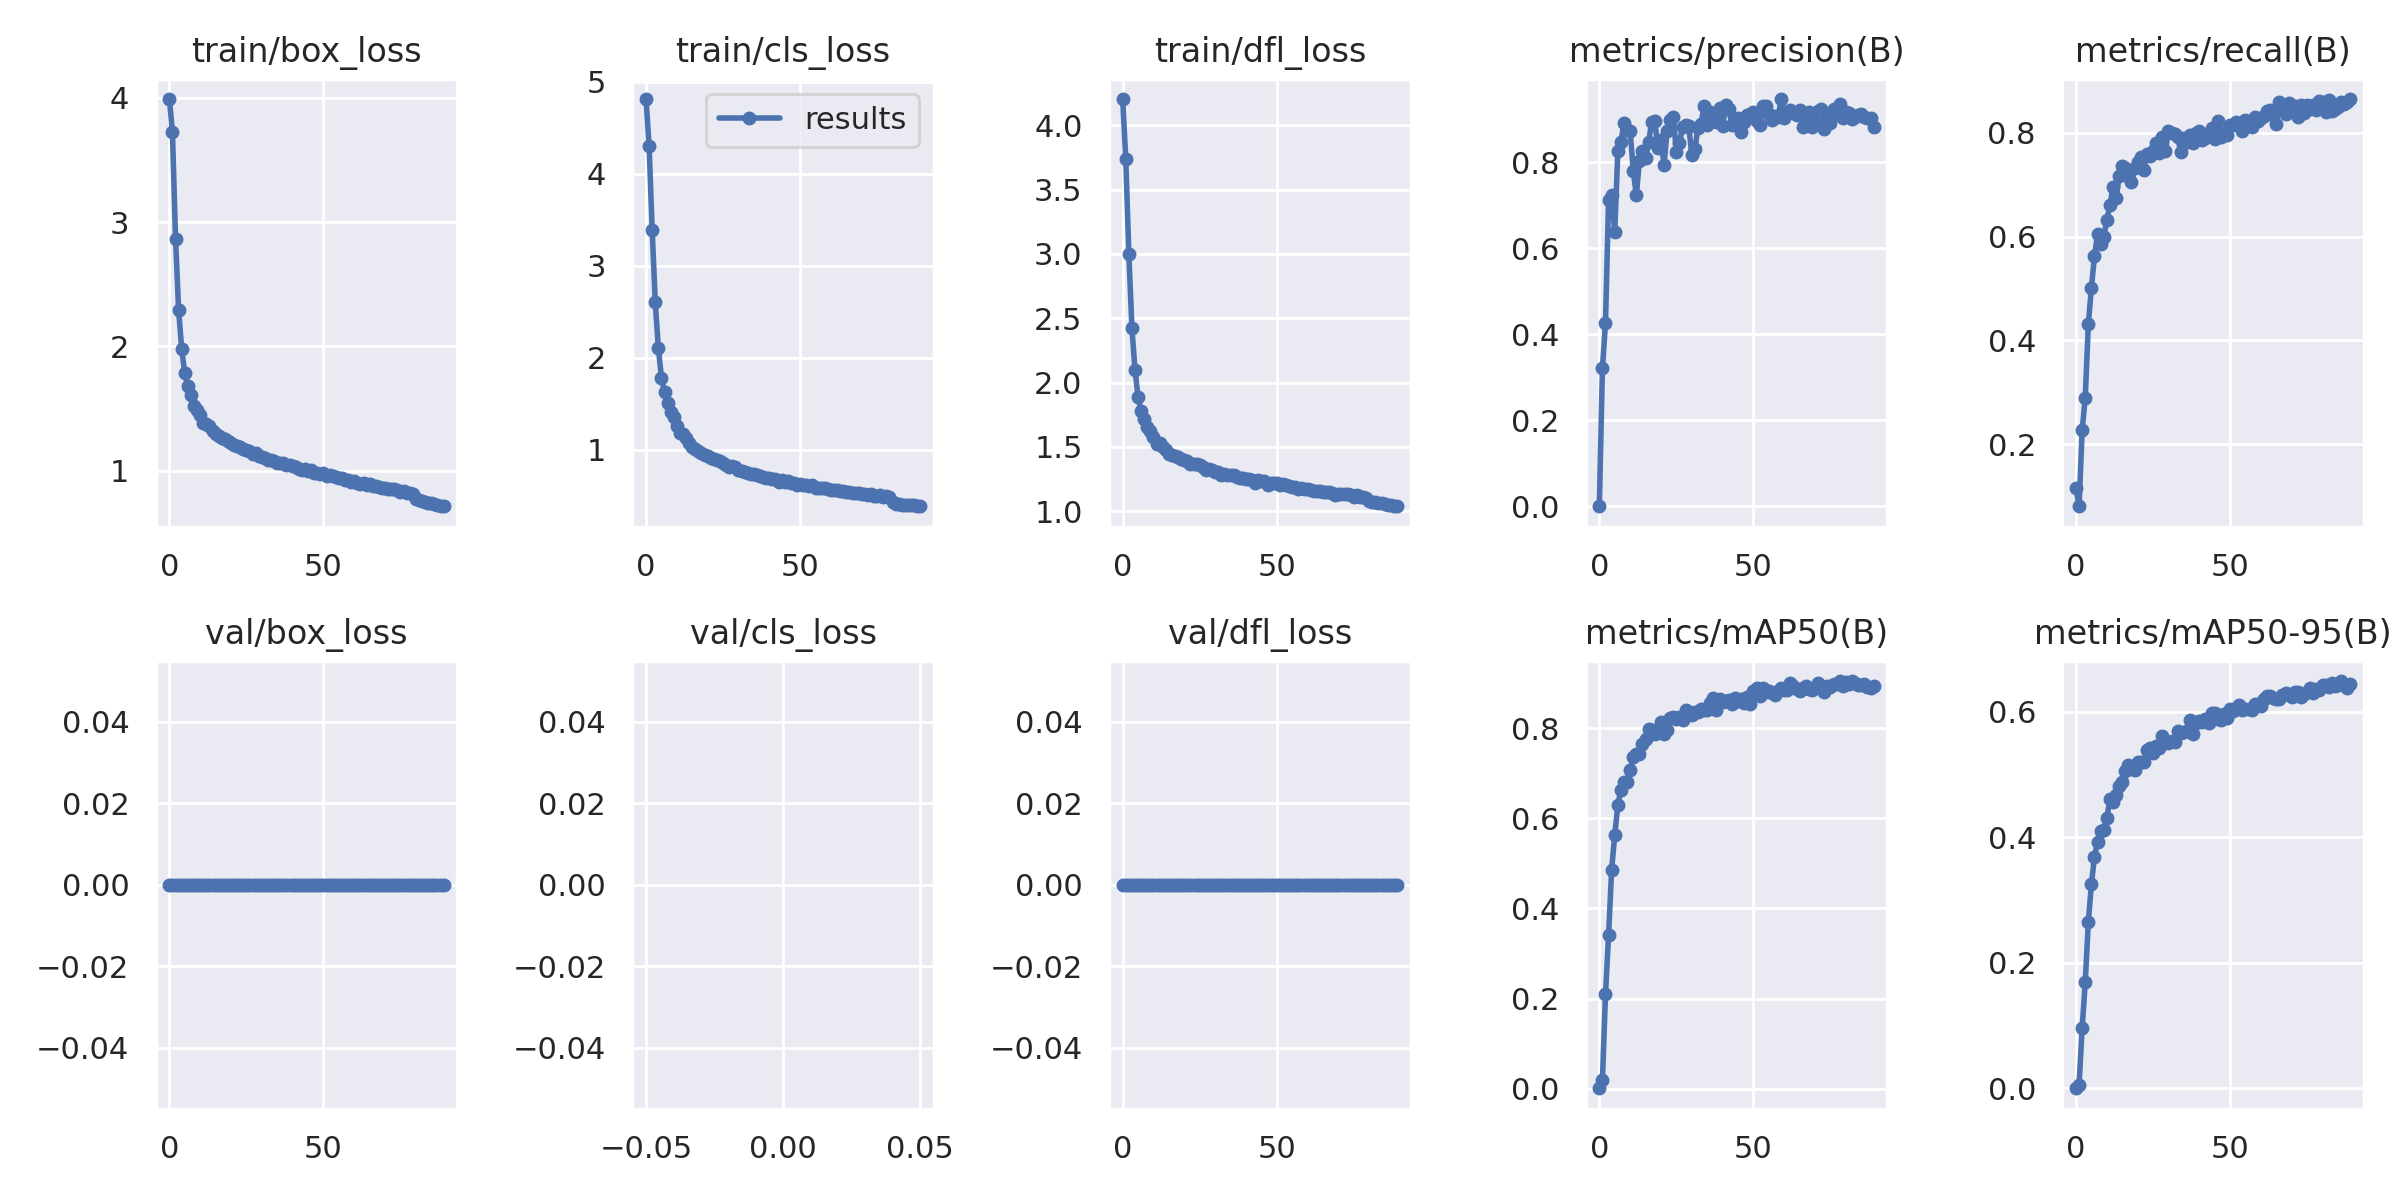

In [21]:
#traingn and validation loss
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

/content


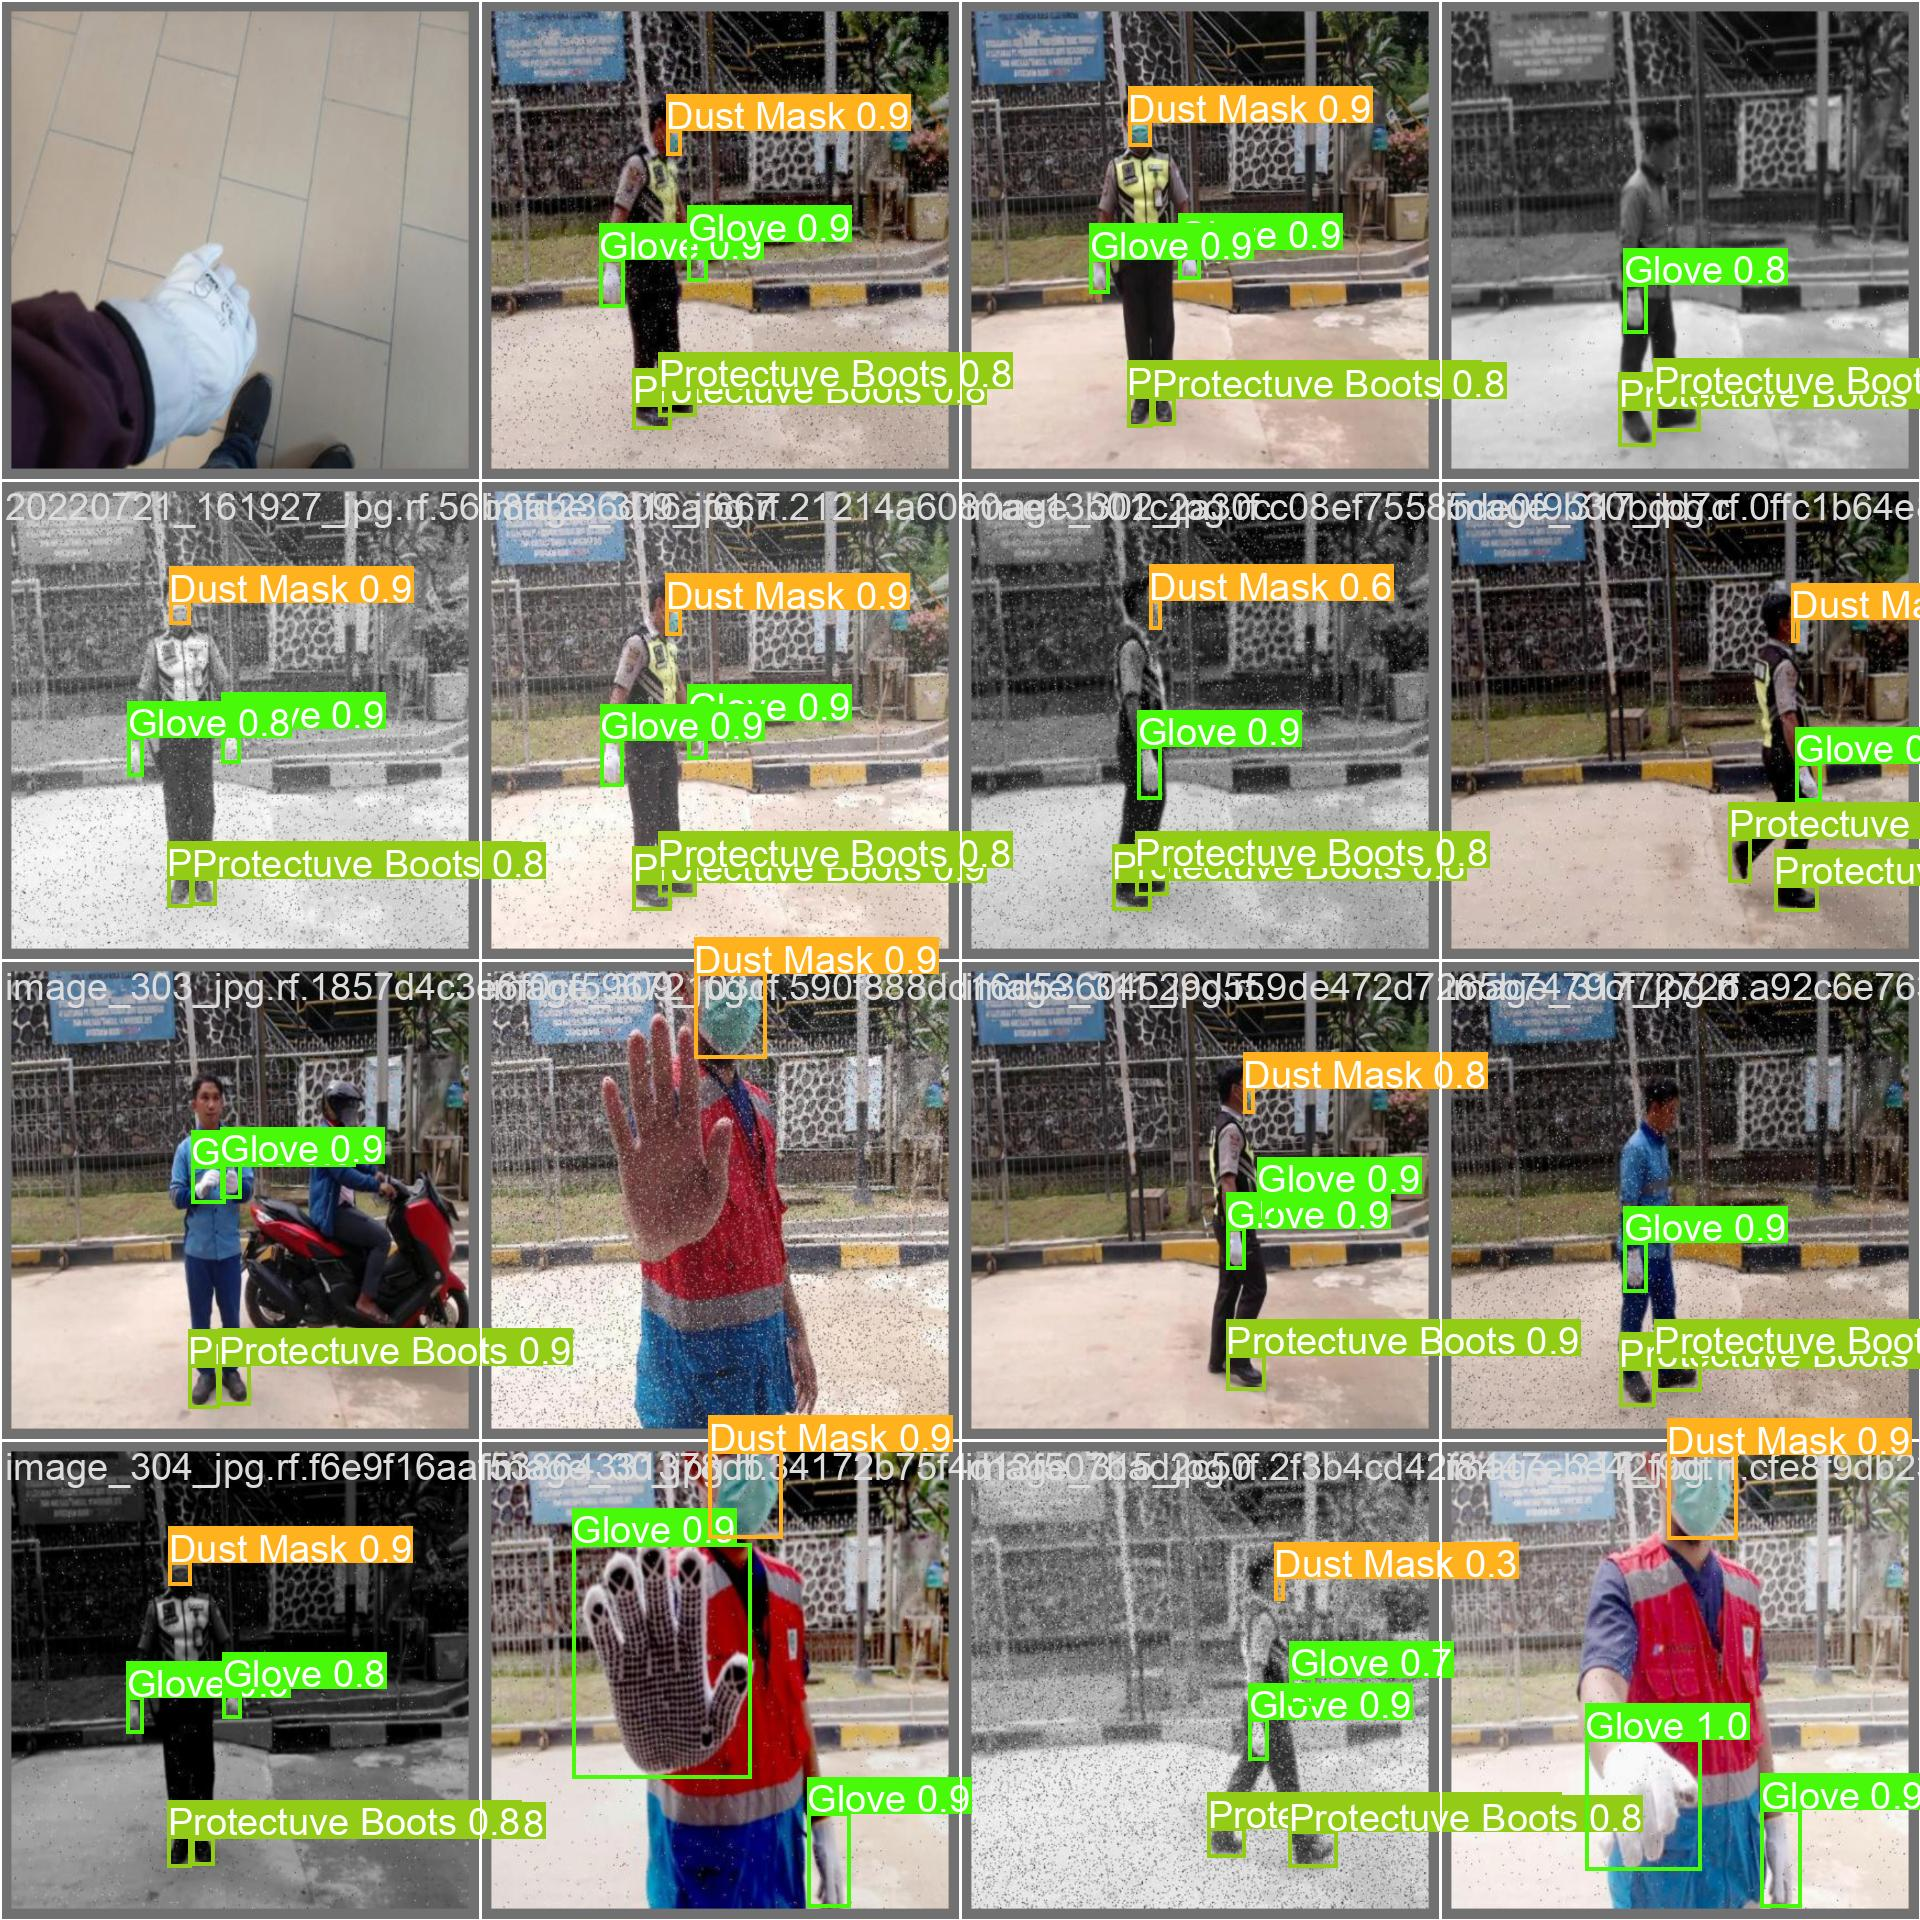

In [22]:
%cd {HOME}

Image (filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg',width=600)



In [23]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/datasets/EEP_Detection/data.yaml

/content
2024-09-05 14:01:42.466700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 14:01:42.486733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 14:01:42.492739: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 14:01:42.508106: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 14:01:43.830404: W tensorflow/com

In [24]:
#inference mean with custom model

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/datasets/EEP_Detection/test/images save=True

/content
2024-09-05 14:03:46.395714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 14:03:46.416711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 14:03:46.422852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 14:03:46.437172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 14:03:47.661481: W tensorflow/com

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs.detect/predict3/*.jpg')[:3]:
  display(Image(filename=image_path,width=600))
  print("\n")

In [26]:
!gdown "https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1crFwrpMF1OlaJ0ZCZjBNRo9llLEVR8VQ&confirm=t
To: /content/demo.mp4
100% 42.9M/42.9M [00:01<00:00, 32.1MB/s]


In [27]:
import os
os.environ['HYDRA_FULL_ERROR'] = '1'


%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2024-09-05 14:12:46.304428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 14:12:46.334677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 14:12:46.340777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 14:12:46.355093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 14:12:47.557121: W tensorflow/com

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo4.mp4'

/content
2024-09-05 14:23:05.354932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 14:23:05.377442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 14:23:05.383953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 14:23:05.398959: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 14:23:06.639155: W tensorflow/com

In [29]:
!ls /content/results_compressed.mp4


ls: cannot access '/content/results_compressed.mp4': No such file or directory


In [ ]:
!rm /content/results_compressed.mp4


rm: cannot remove '/content/results_compressed.mp4': No such file or directory


In [30]:
from IPython.display import HTML
from base64 import b64encode
import os

In [ ]:
save_path = '/content/runs/detect/predict/demo.mp4'

compressed_path = "/content/results_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64, "+b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video.mp4">
</video>
""" % data_url)

FileNotFoundError: [Errno 2] No such file or directory: '/content/results_compressed.mp4'

In [ ]:
import subprocess

save_path = '/content/demo4.mp4'
compressed_path = "/content/results_compressed.mp4"

try:
    result = subprocess.run([
        'ffmpeg', '-i', save_path, '-vcodec', 'libx264', compressed_path
    ], check=True, capture_output=True, text=True)
    print("FFmpeg output:", result.stdout)
except subprocess.CalledProcessError as e:
    print("Error during compression:", e.stderr)

if os.path.isfile(compressed_path):
    print(f"File successfully created: {compressed_path}")
else:
    print(f"File not found: {compressed_path}")


FFmpeg output: 
File successfully created: /content/results_compressed.mp4


/content


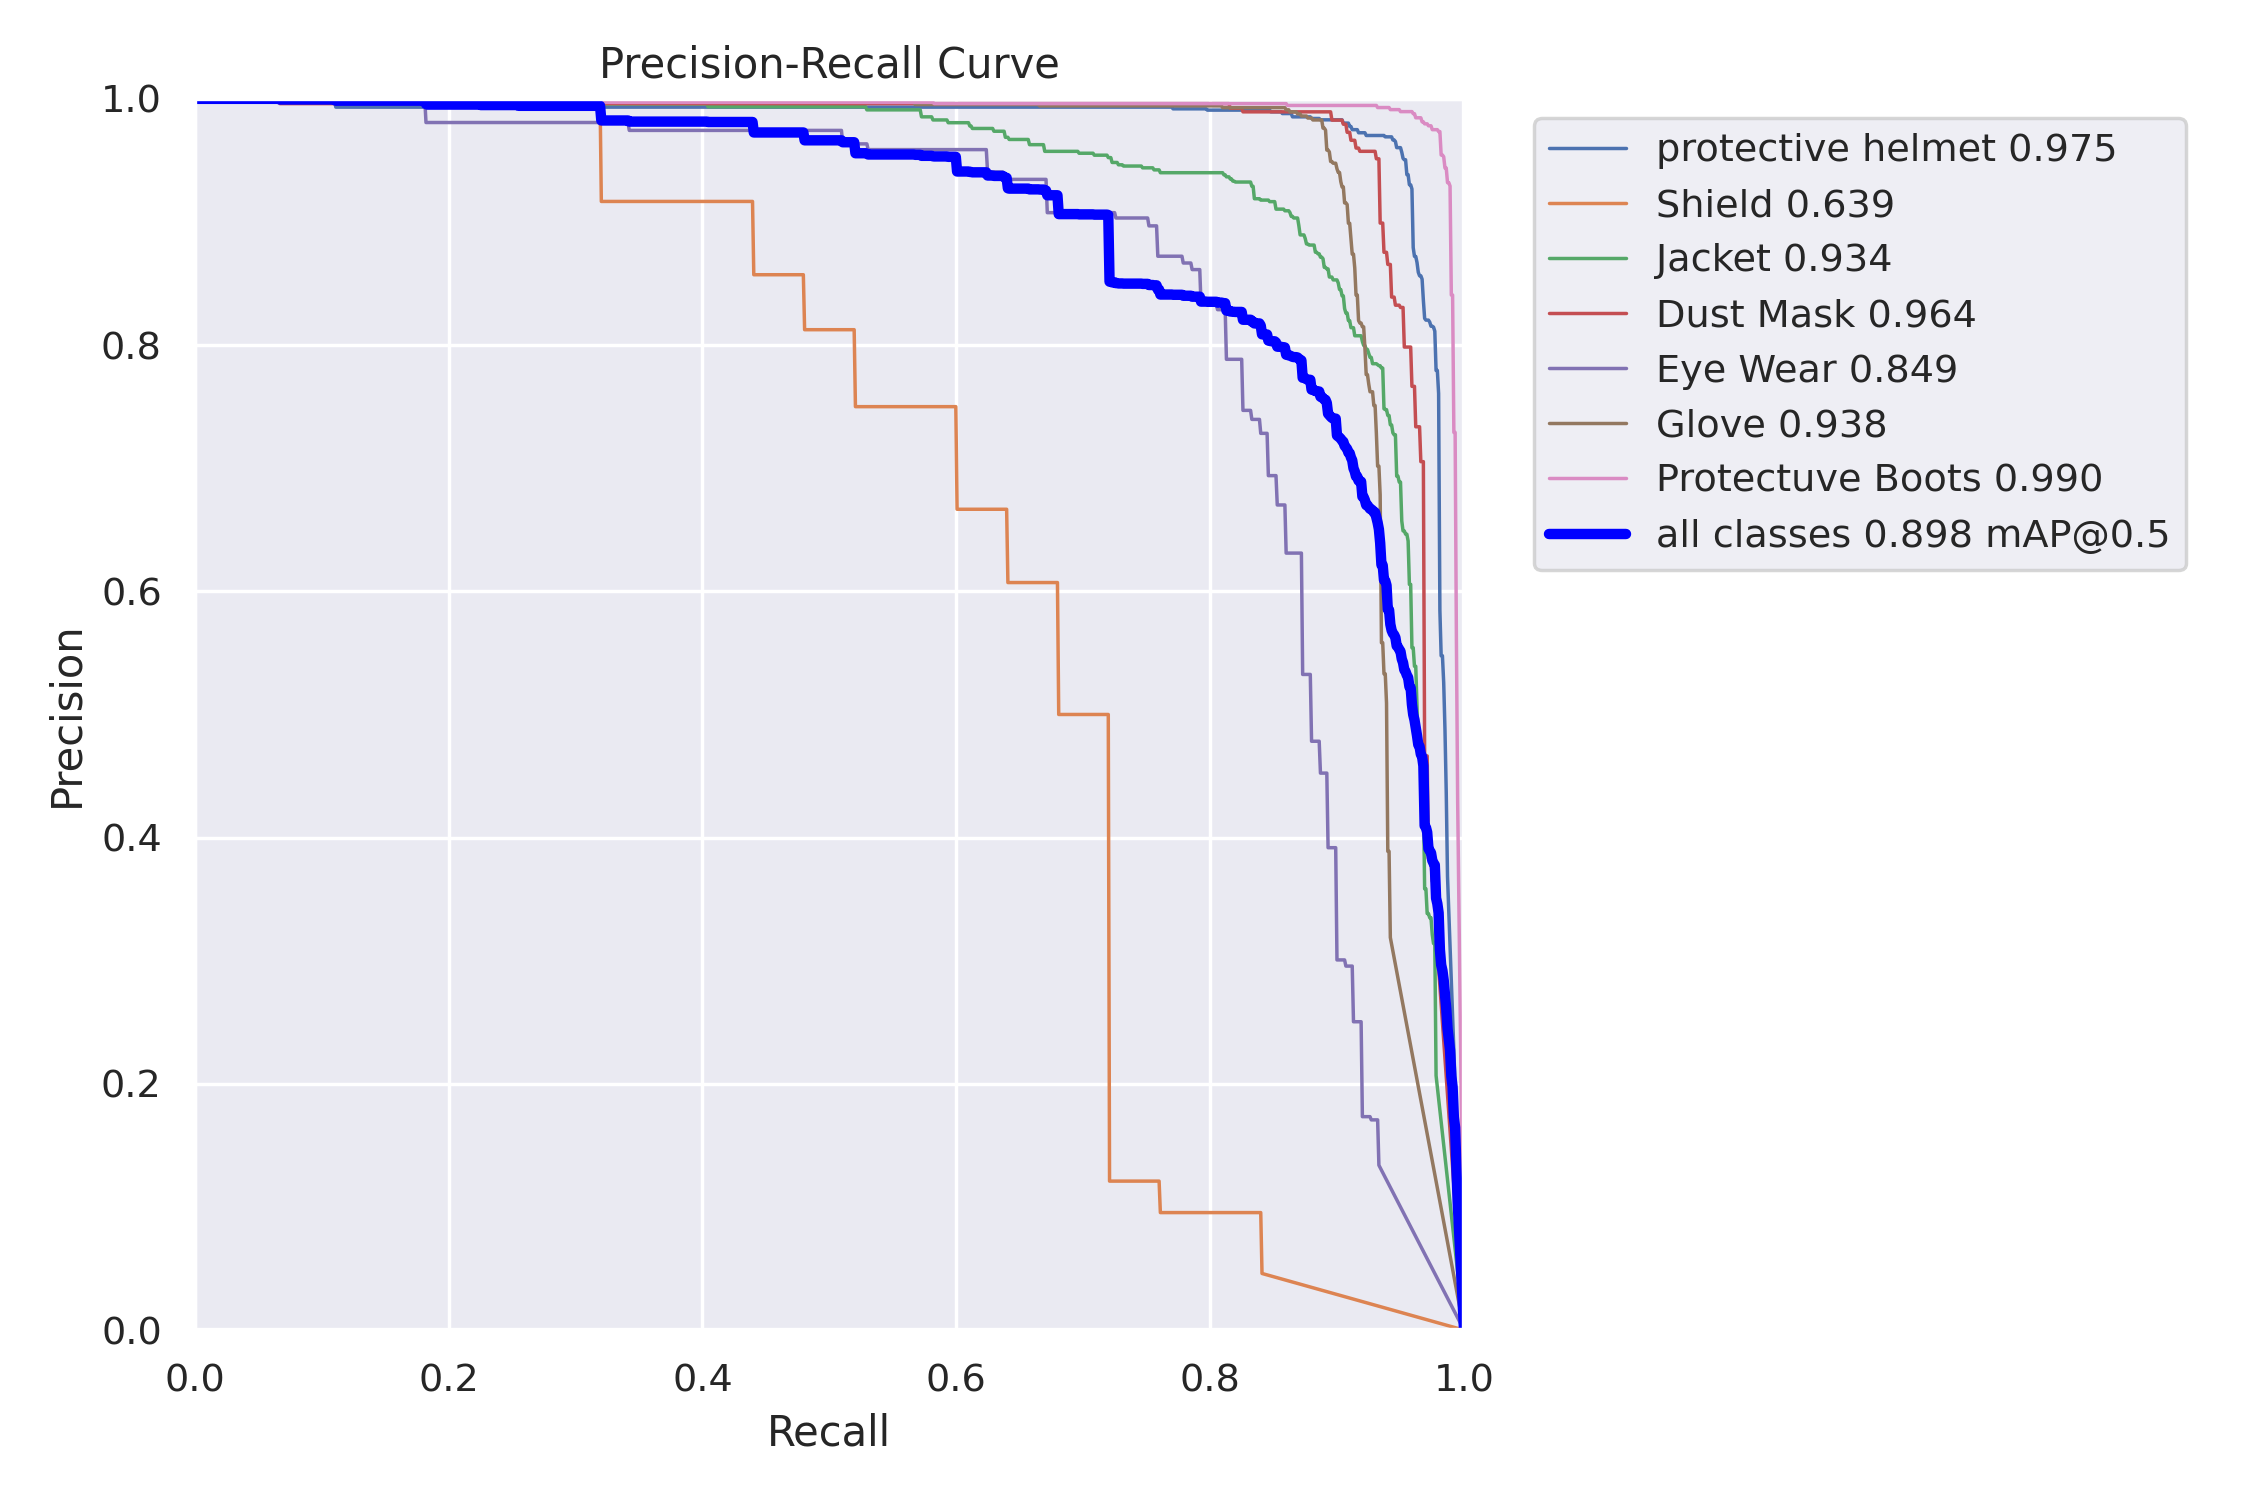

In [37]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/PR_curve.png',width=600)

/content


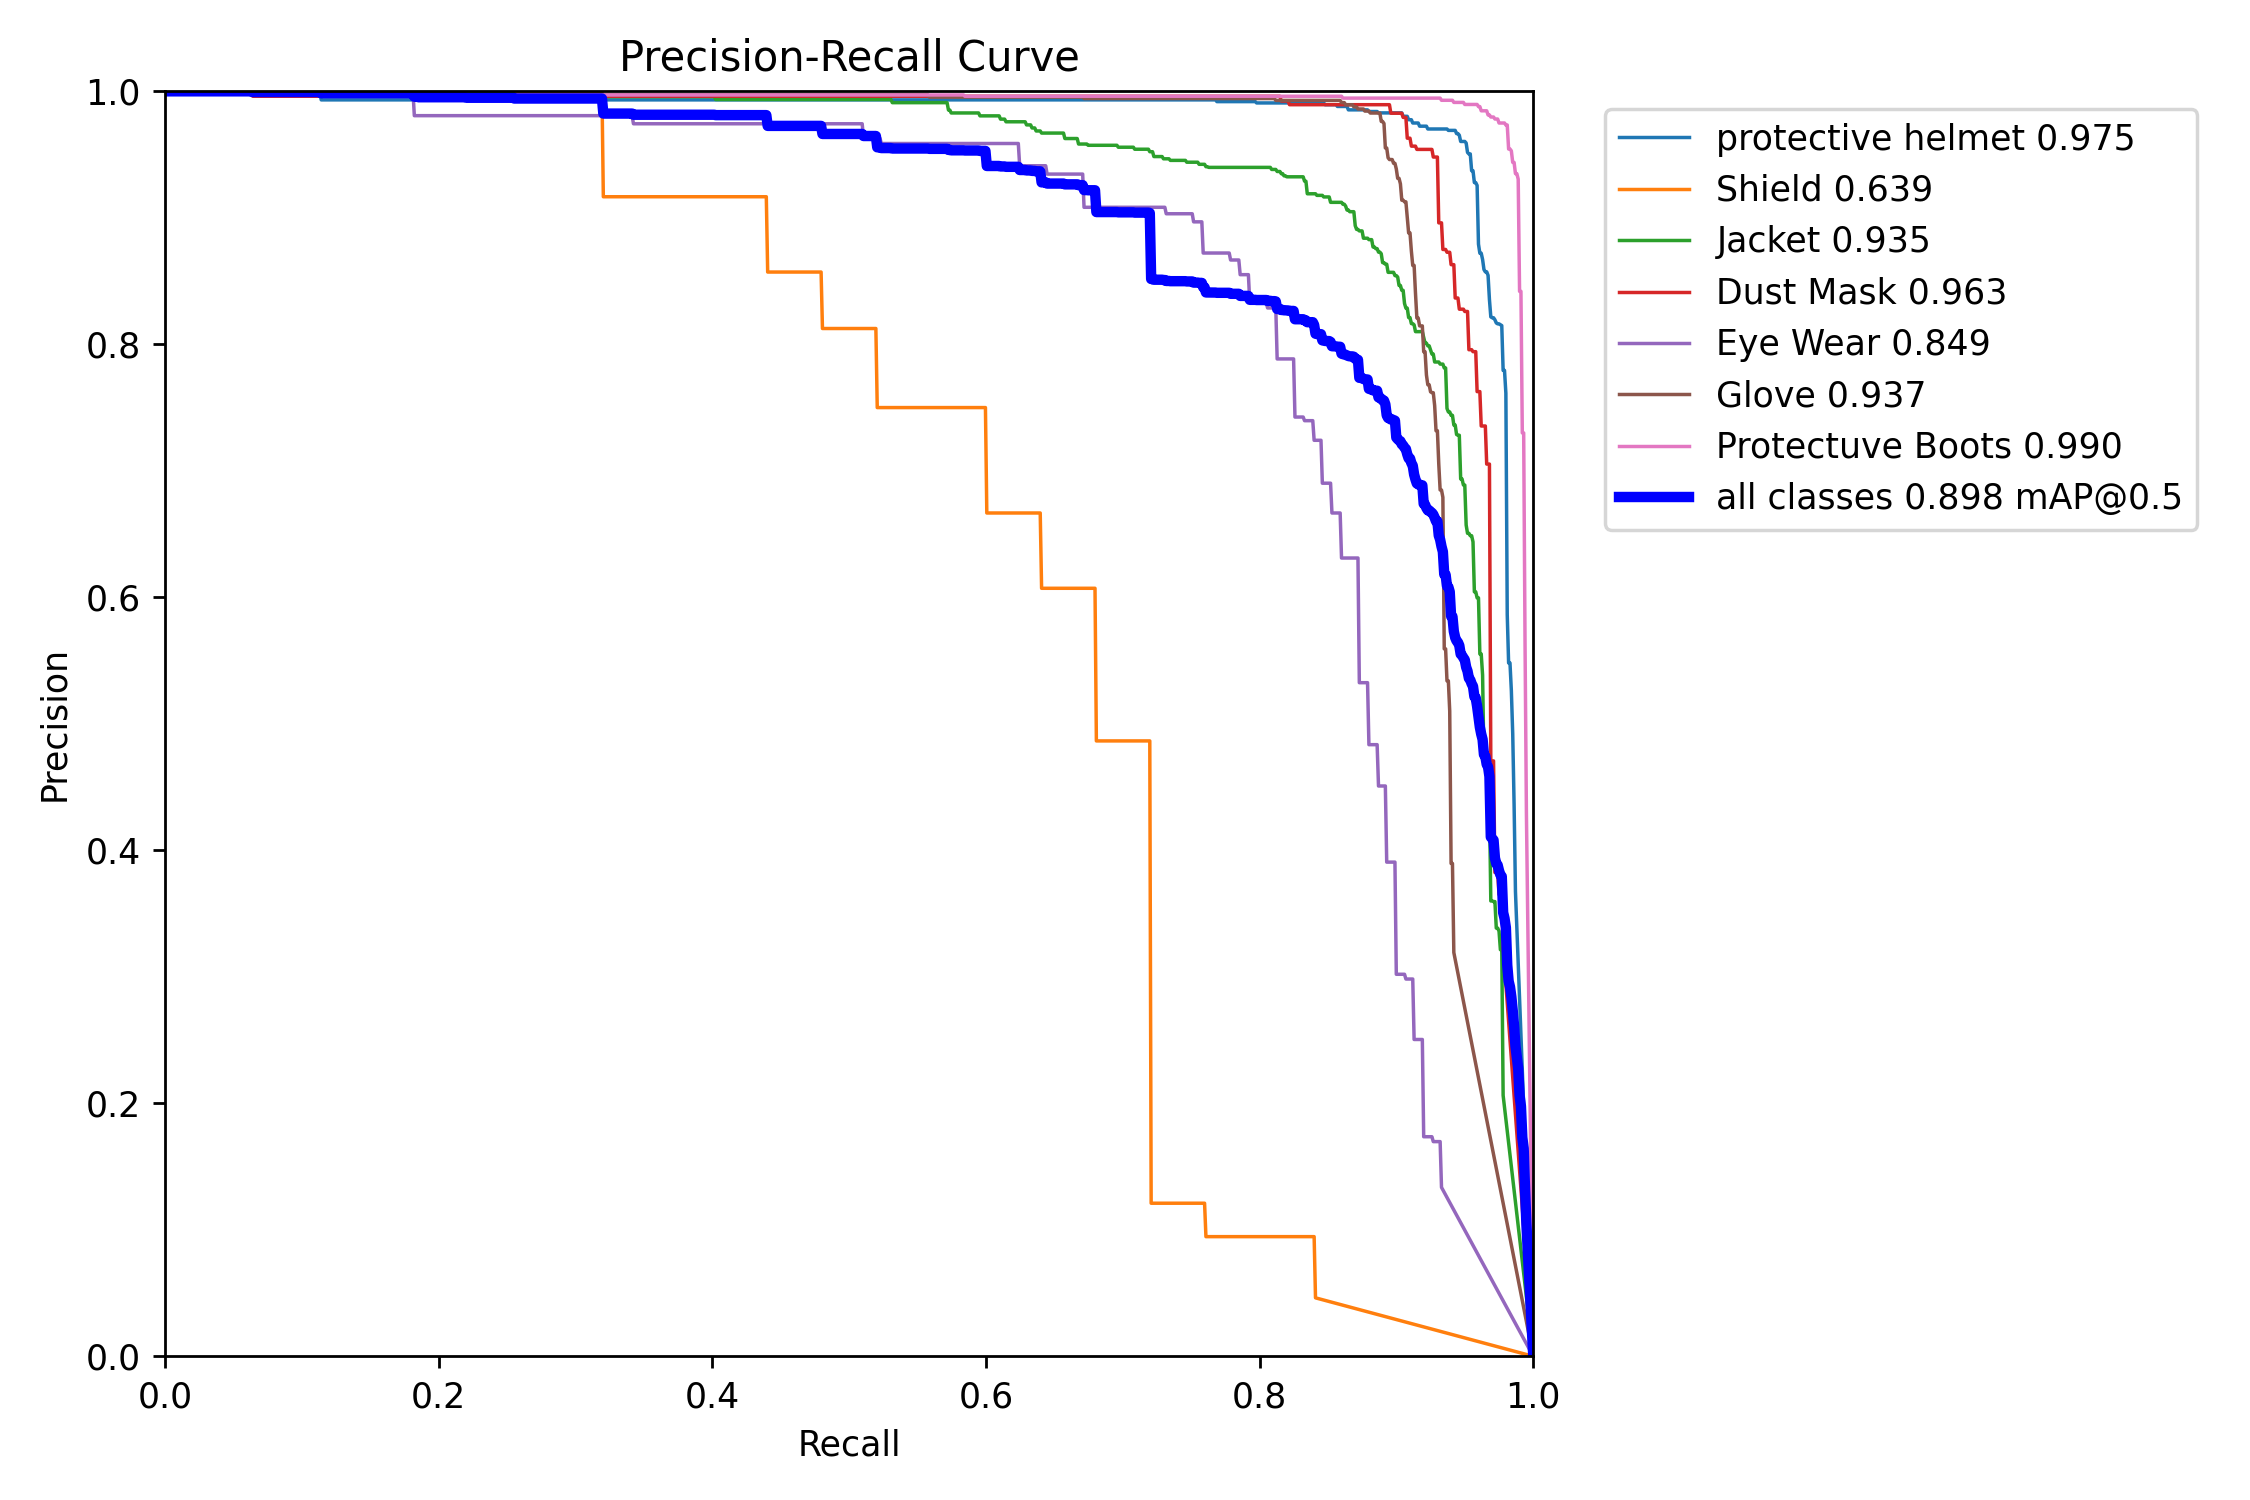

In [45]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/PR_curve.png',width=600)

/content


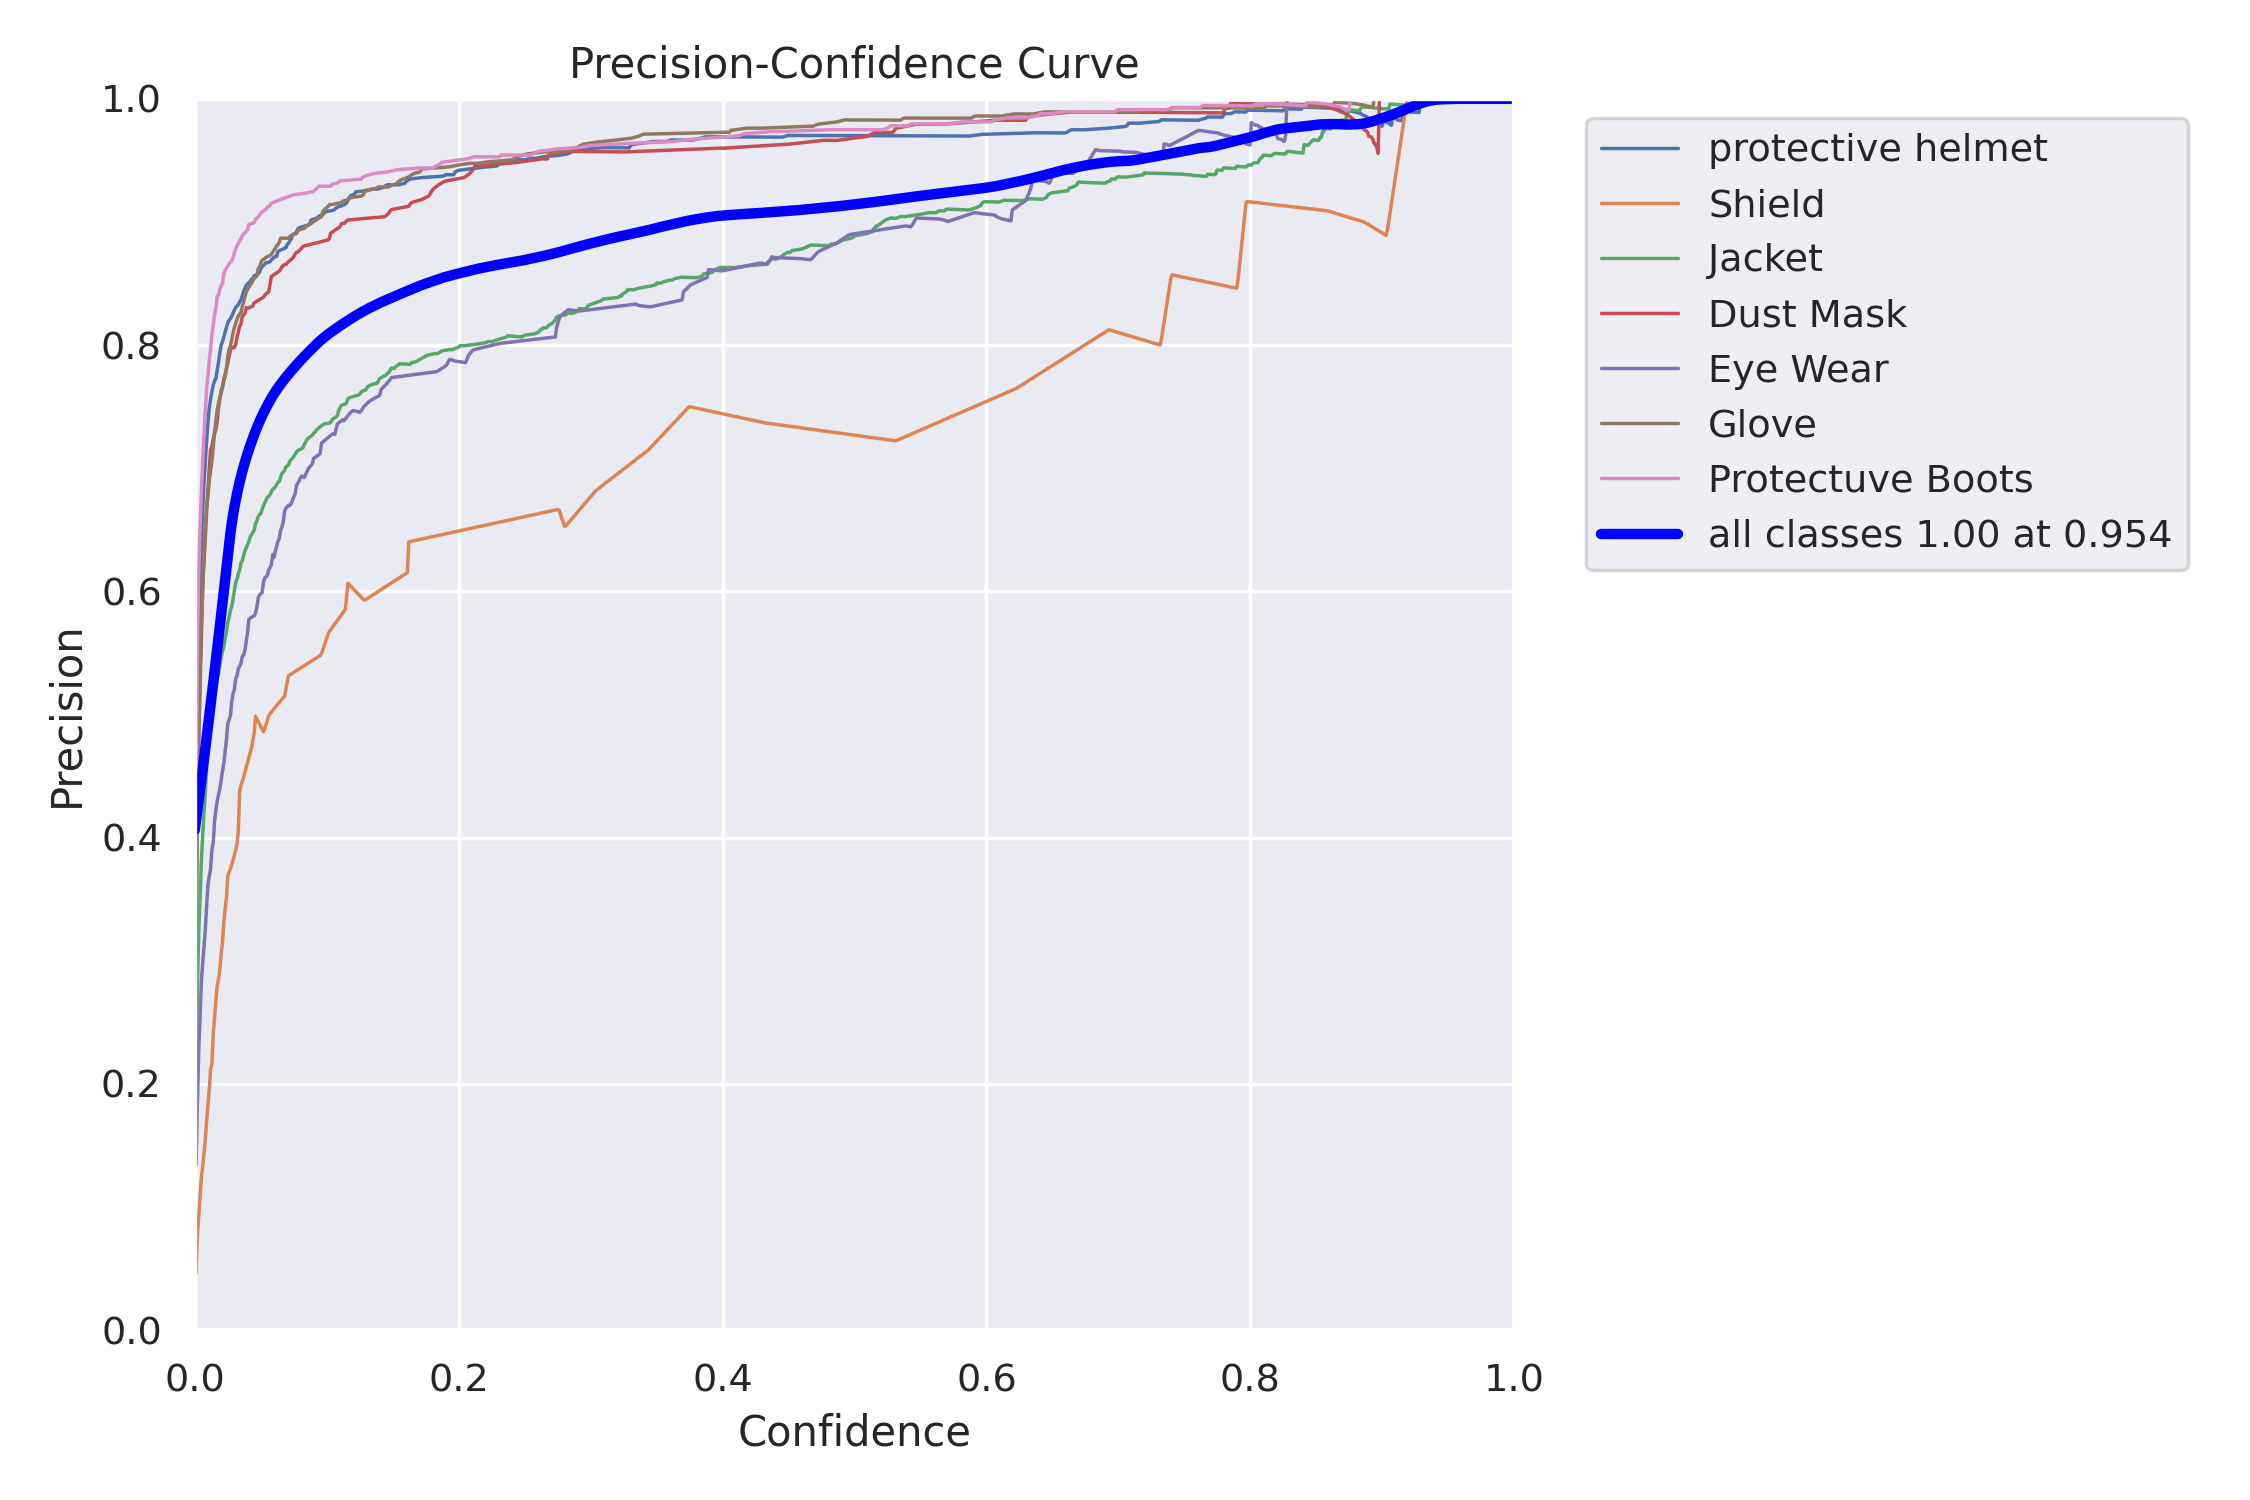

In [39]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/P_curve.png',width=600)

/content


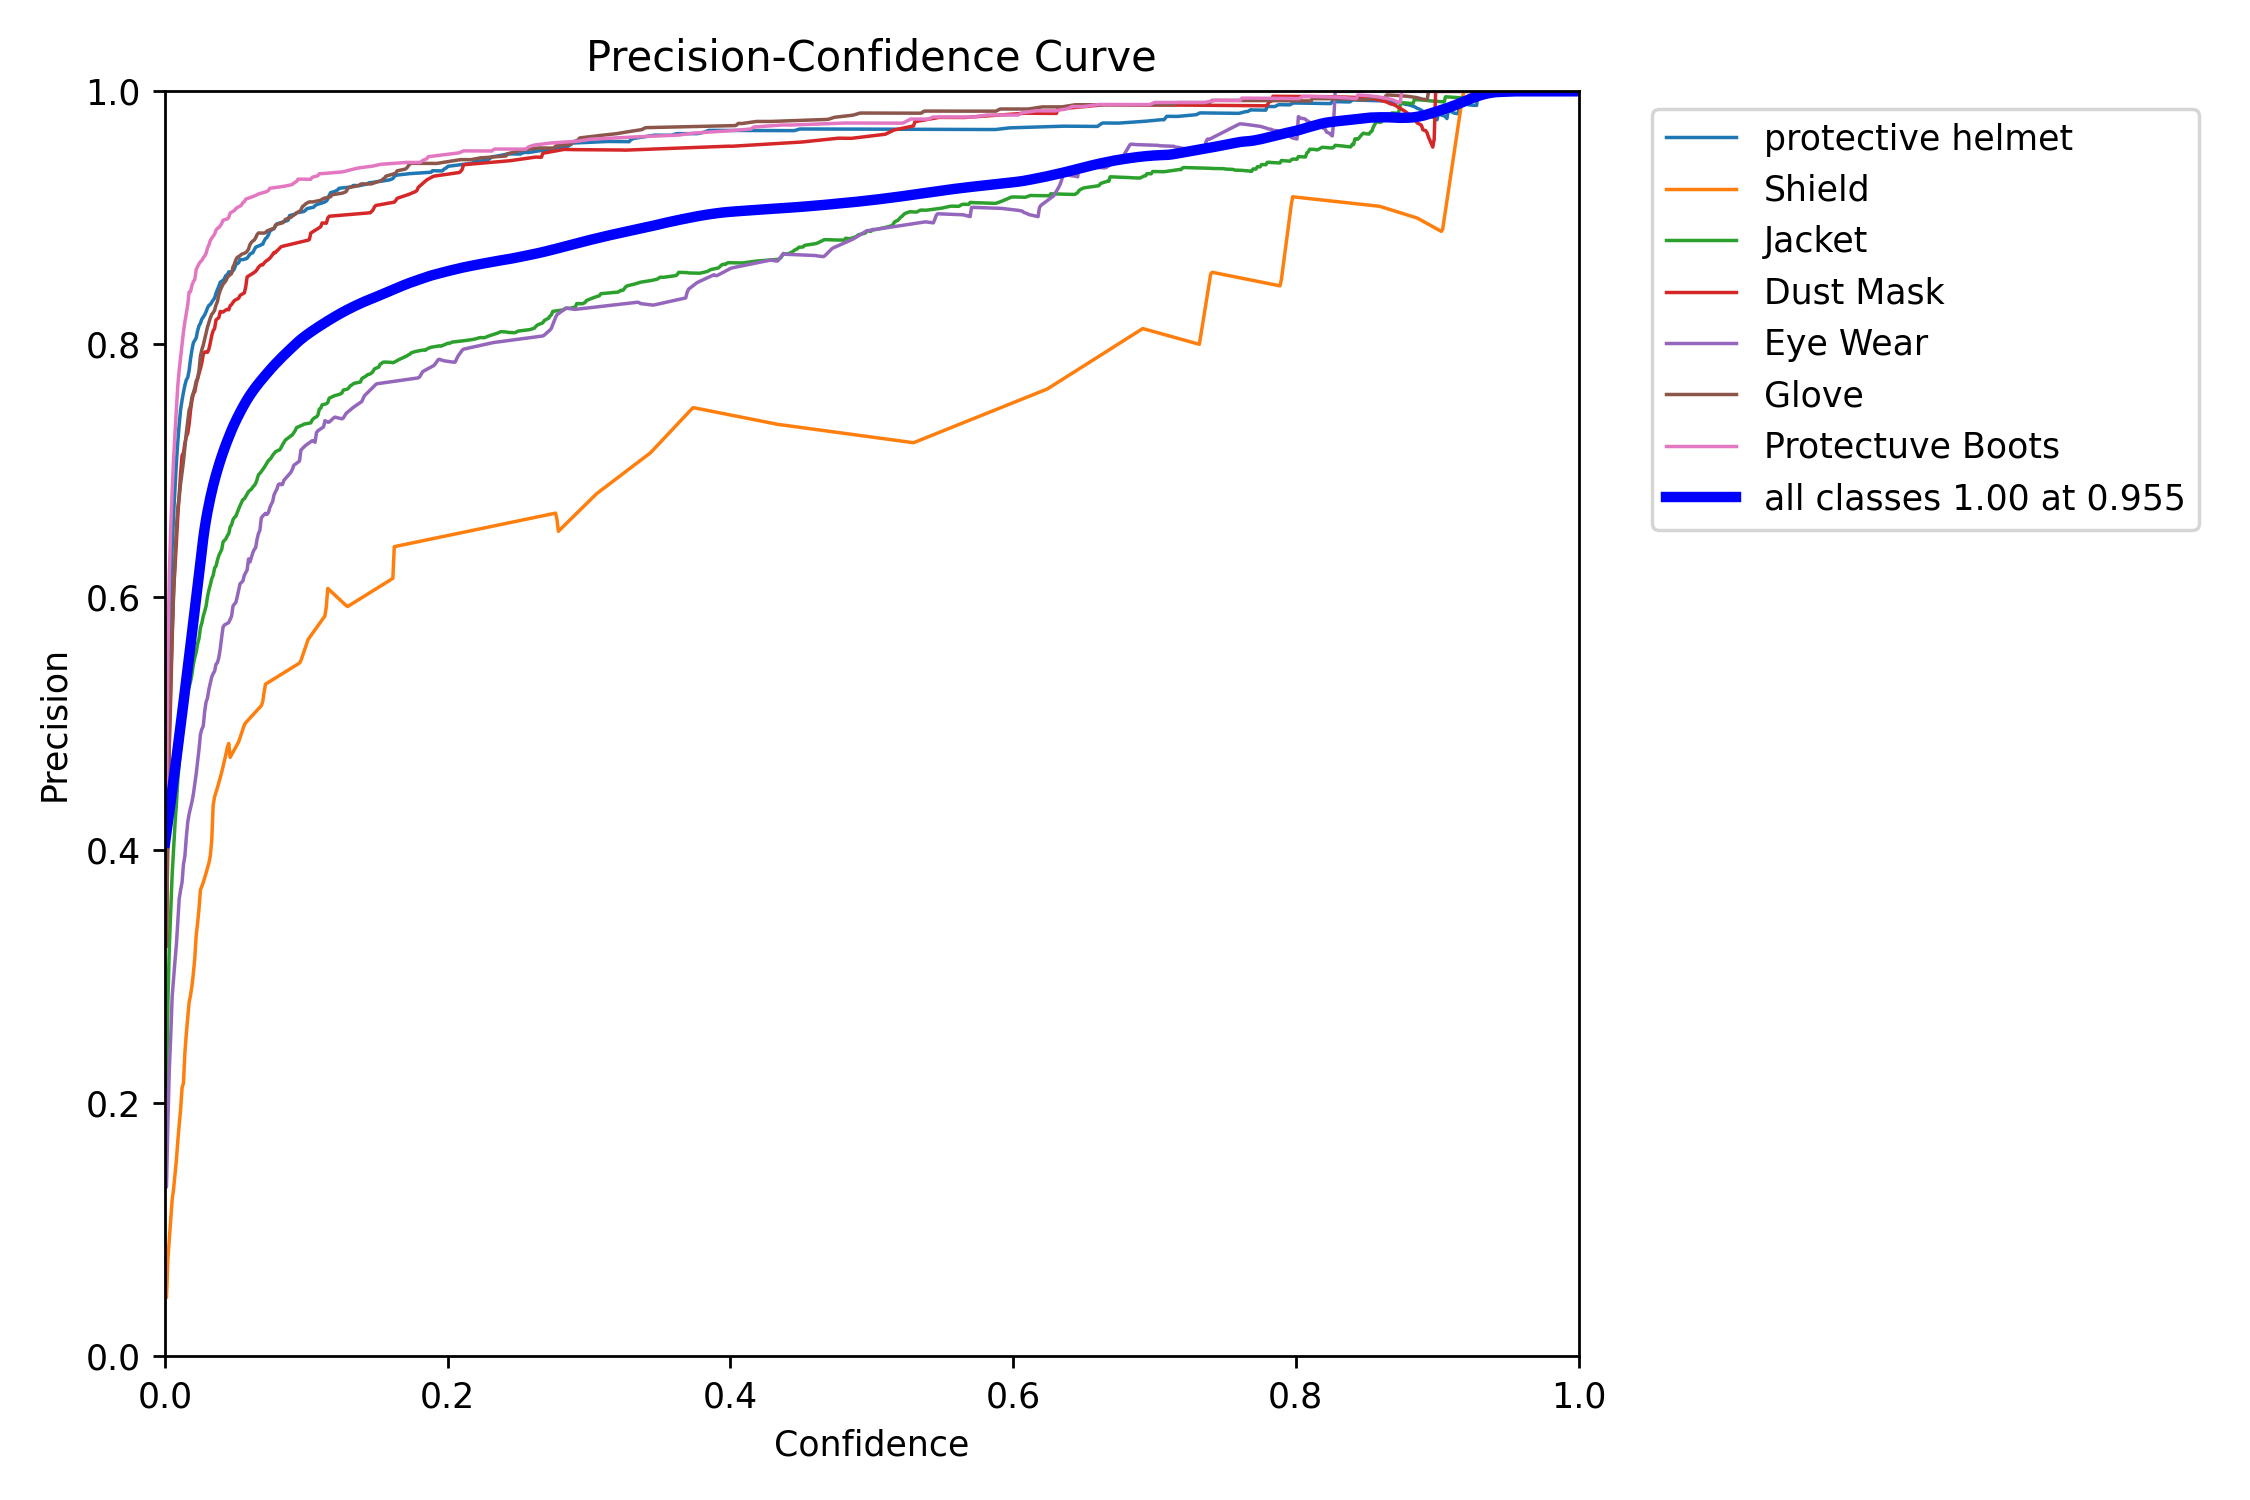

In [43]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/P_curve.png',width=600)

/content


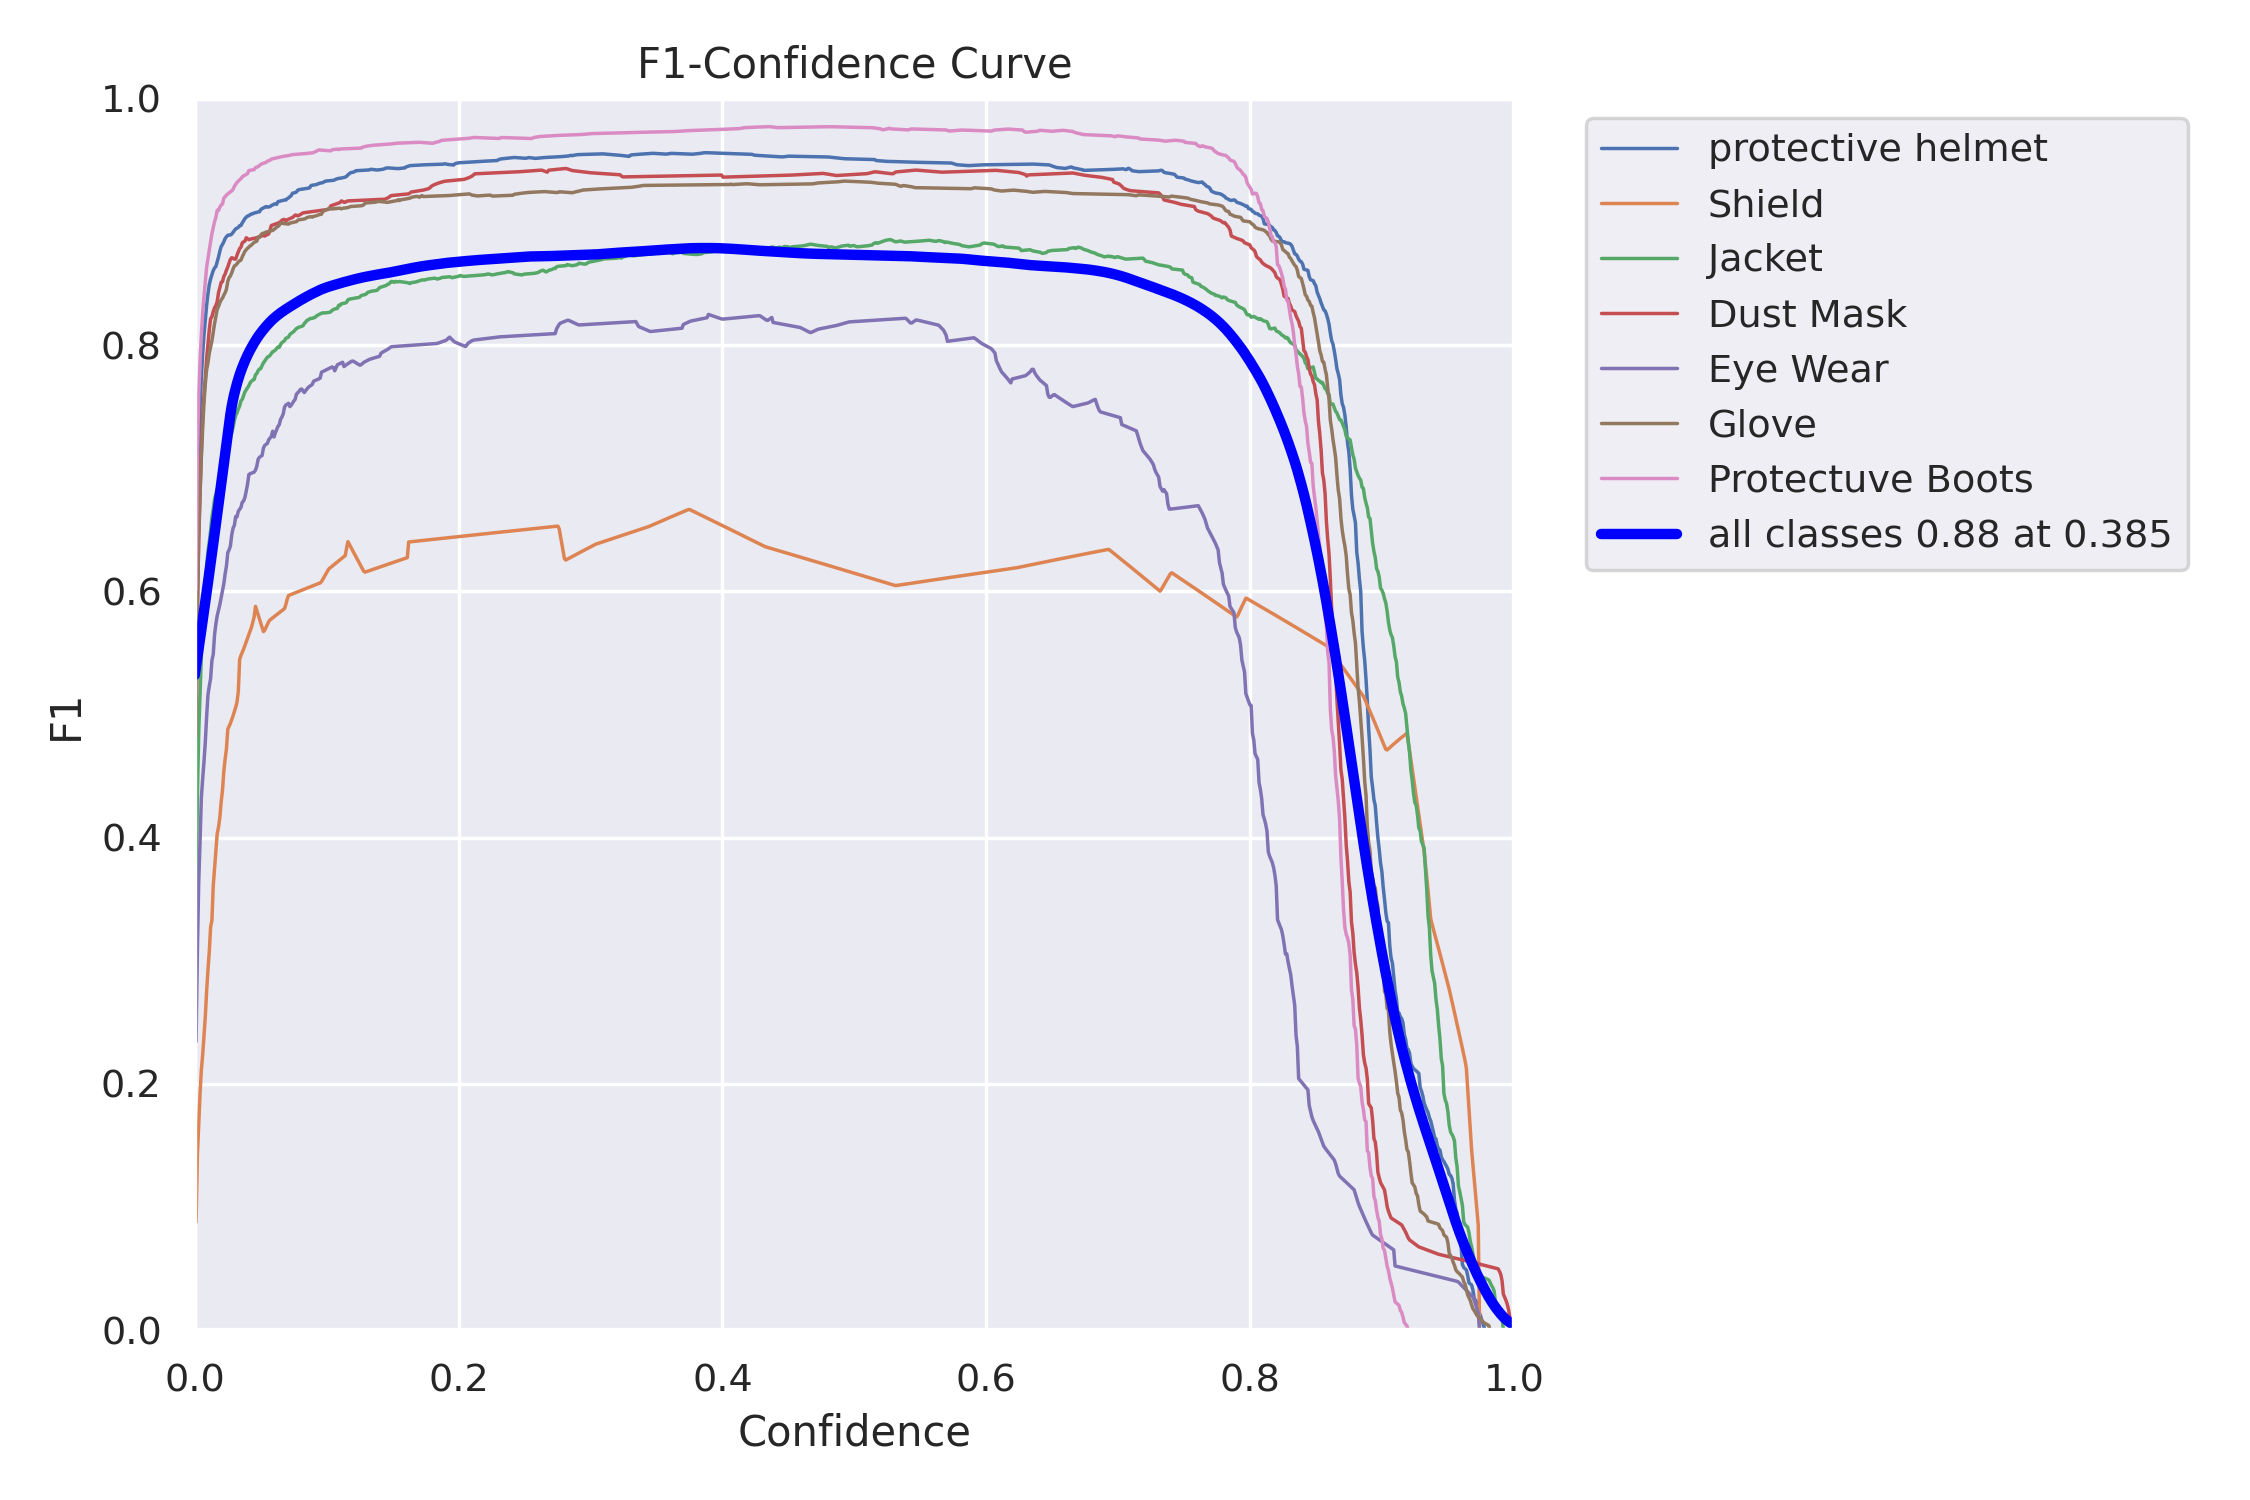

In [40]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/F1_curve.png',width=600)

/content


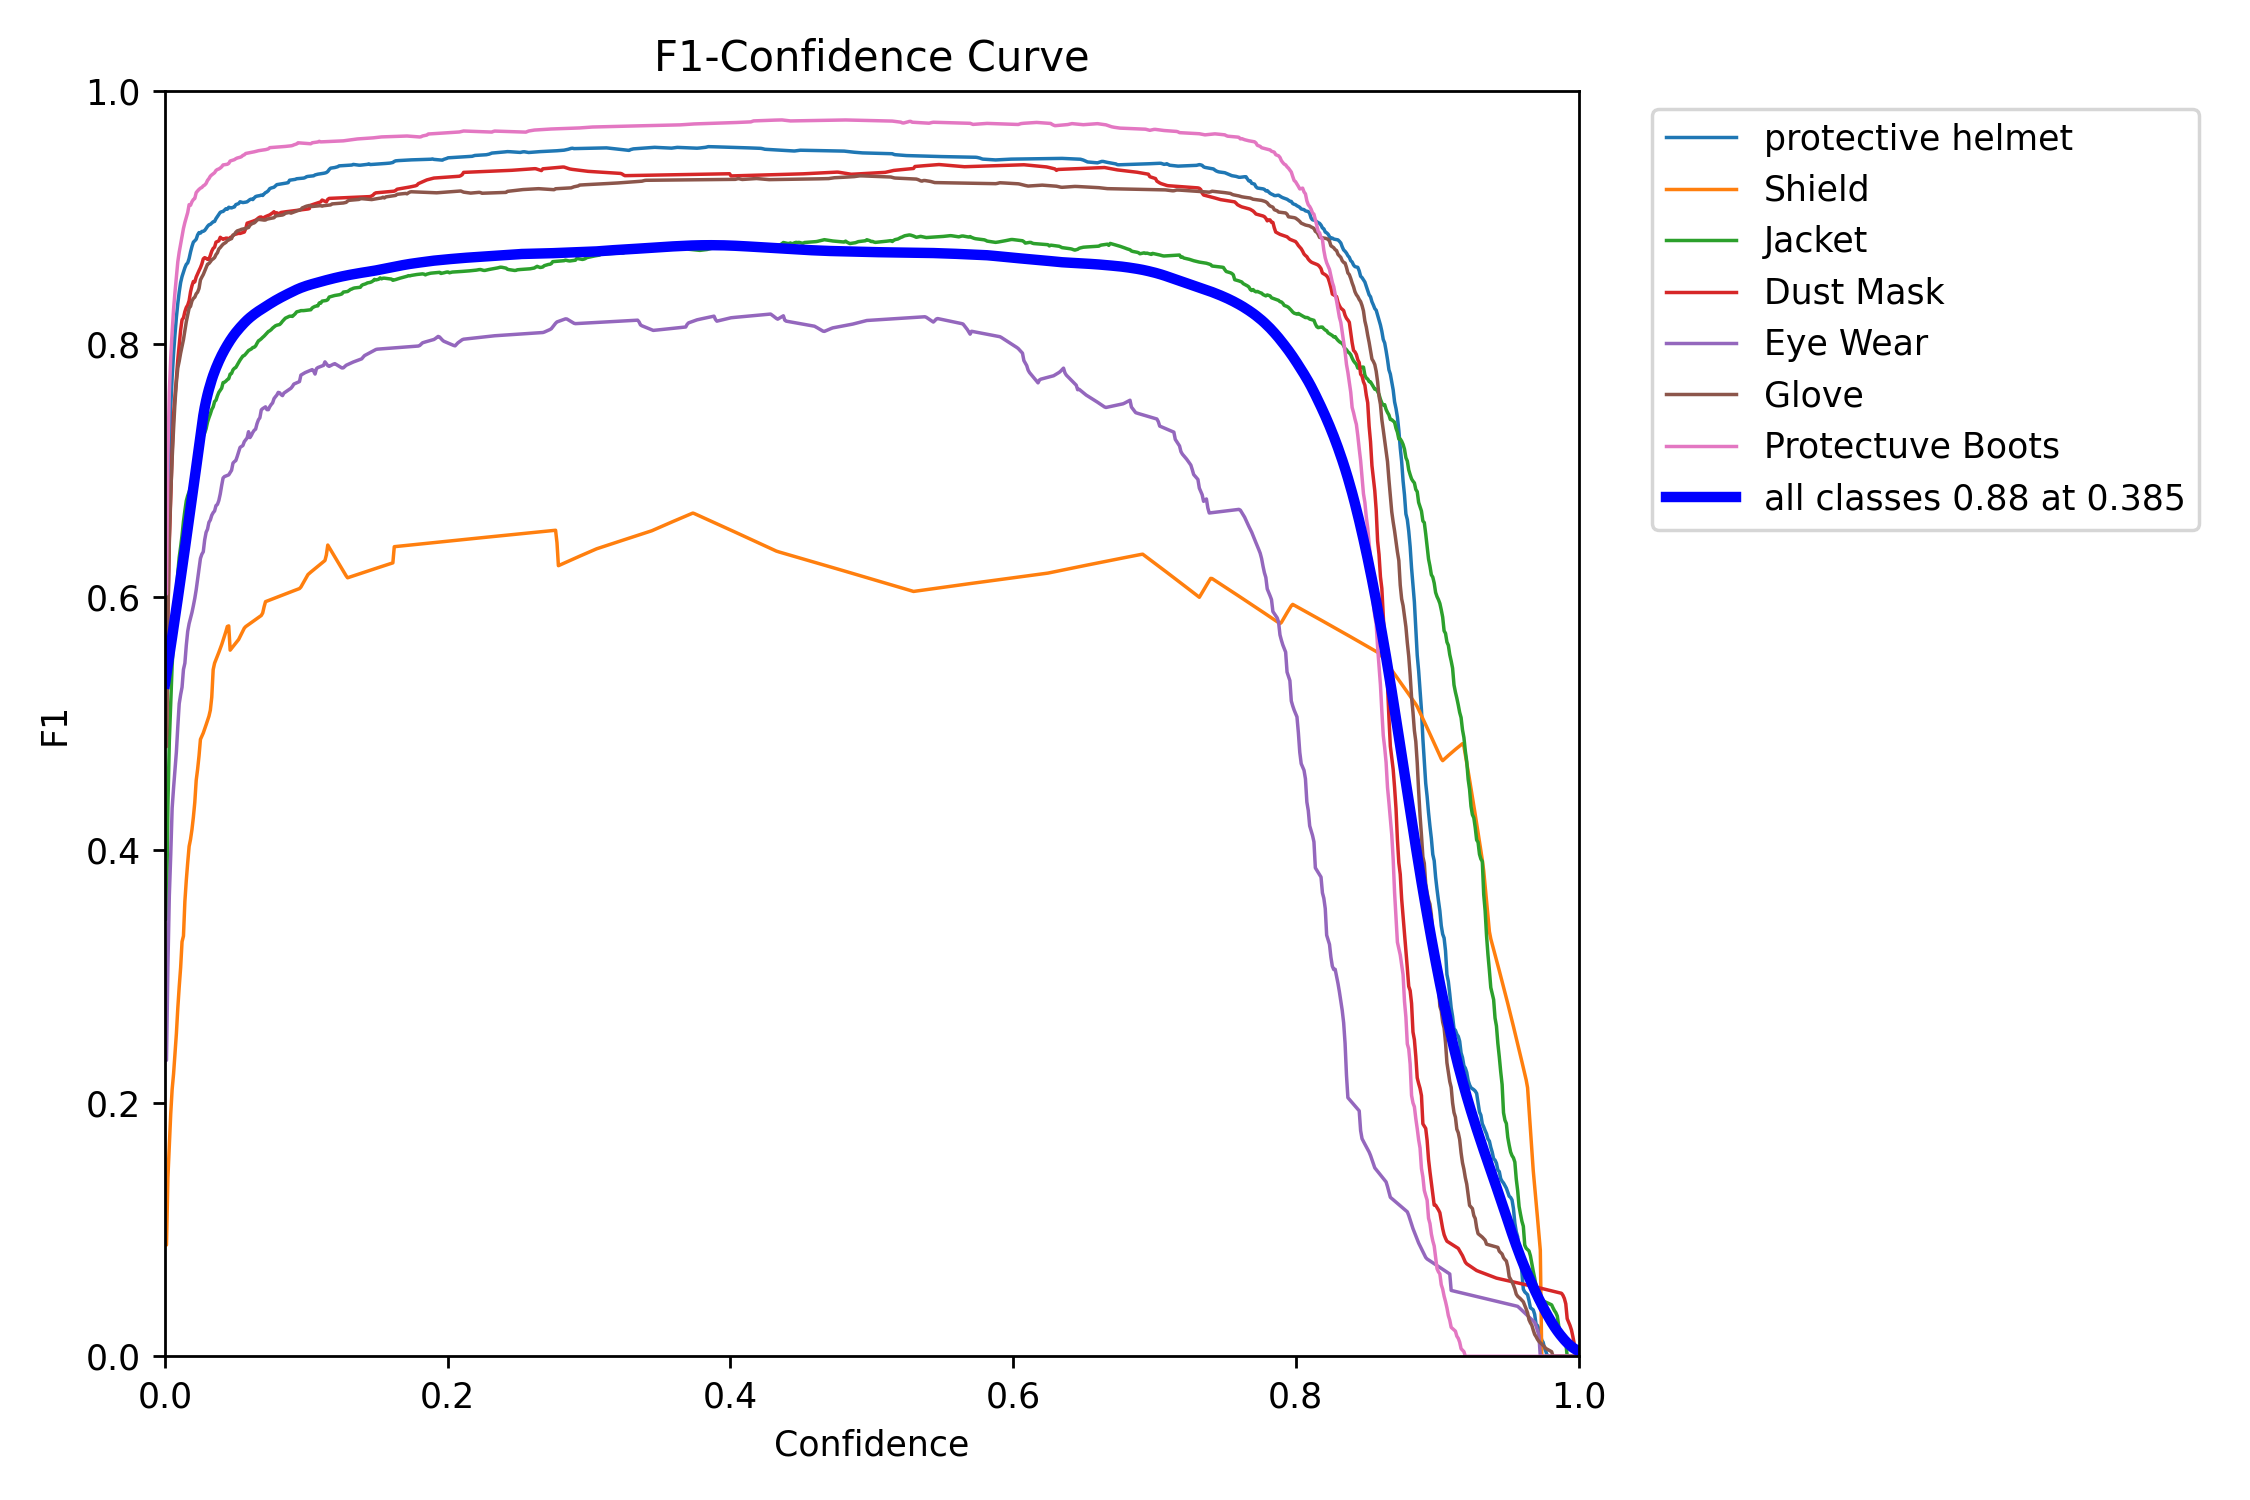

In [42]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/F1_curve.png',width=600)

/content


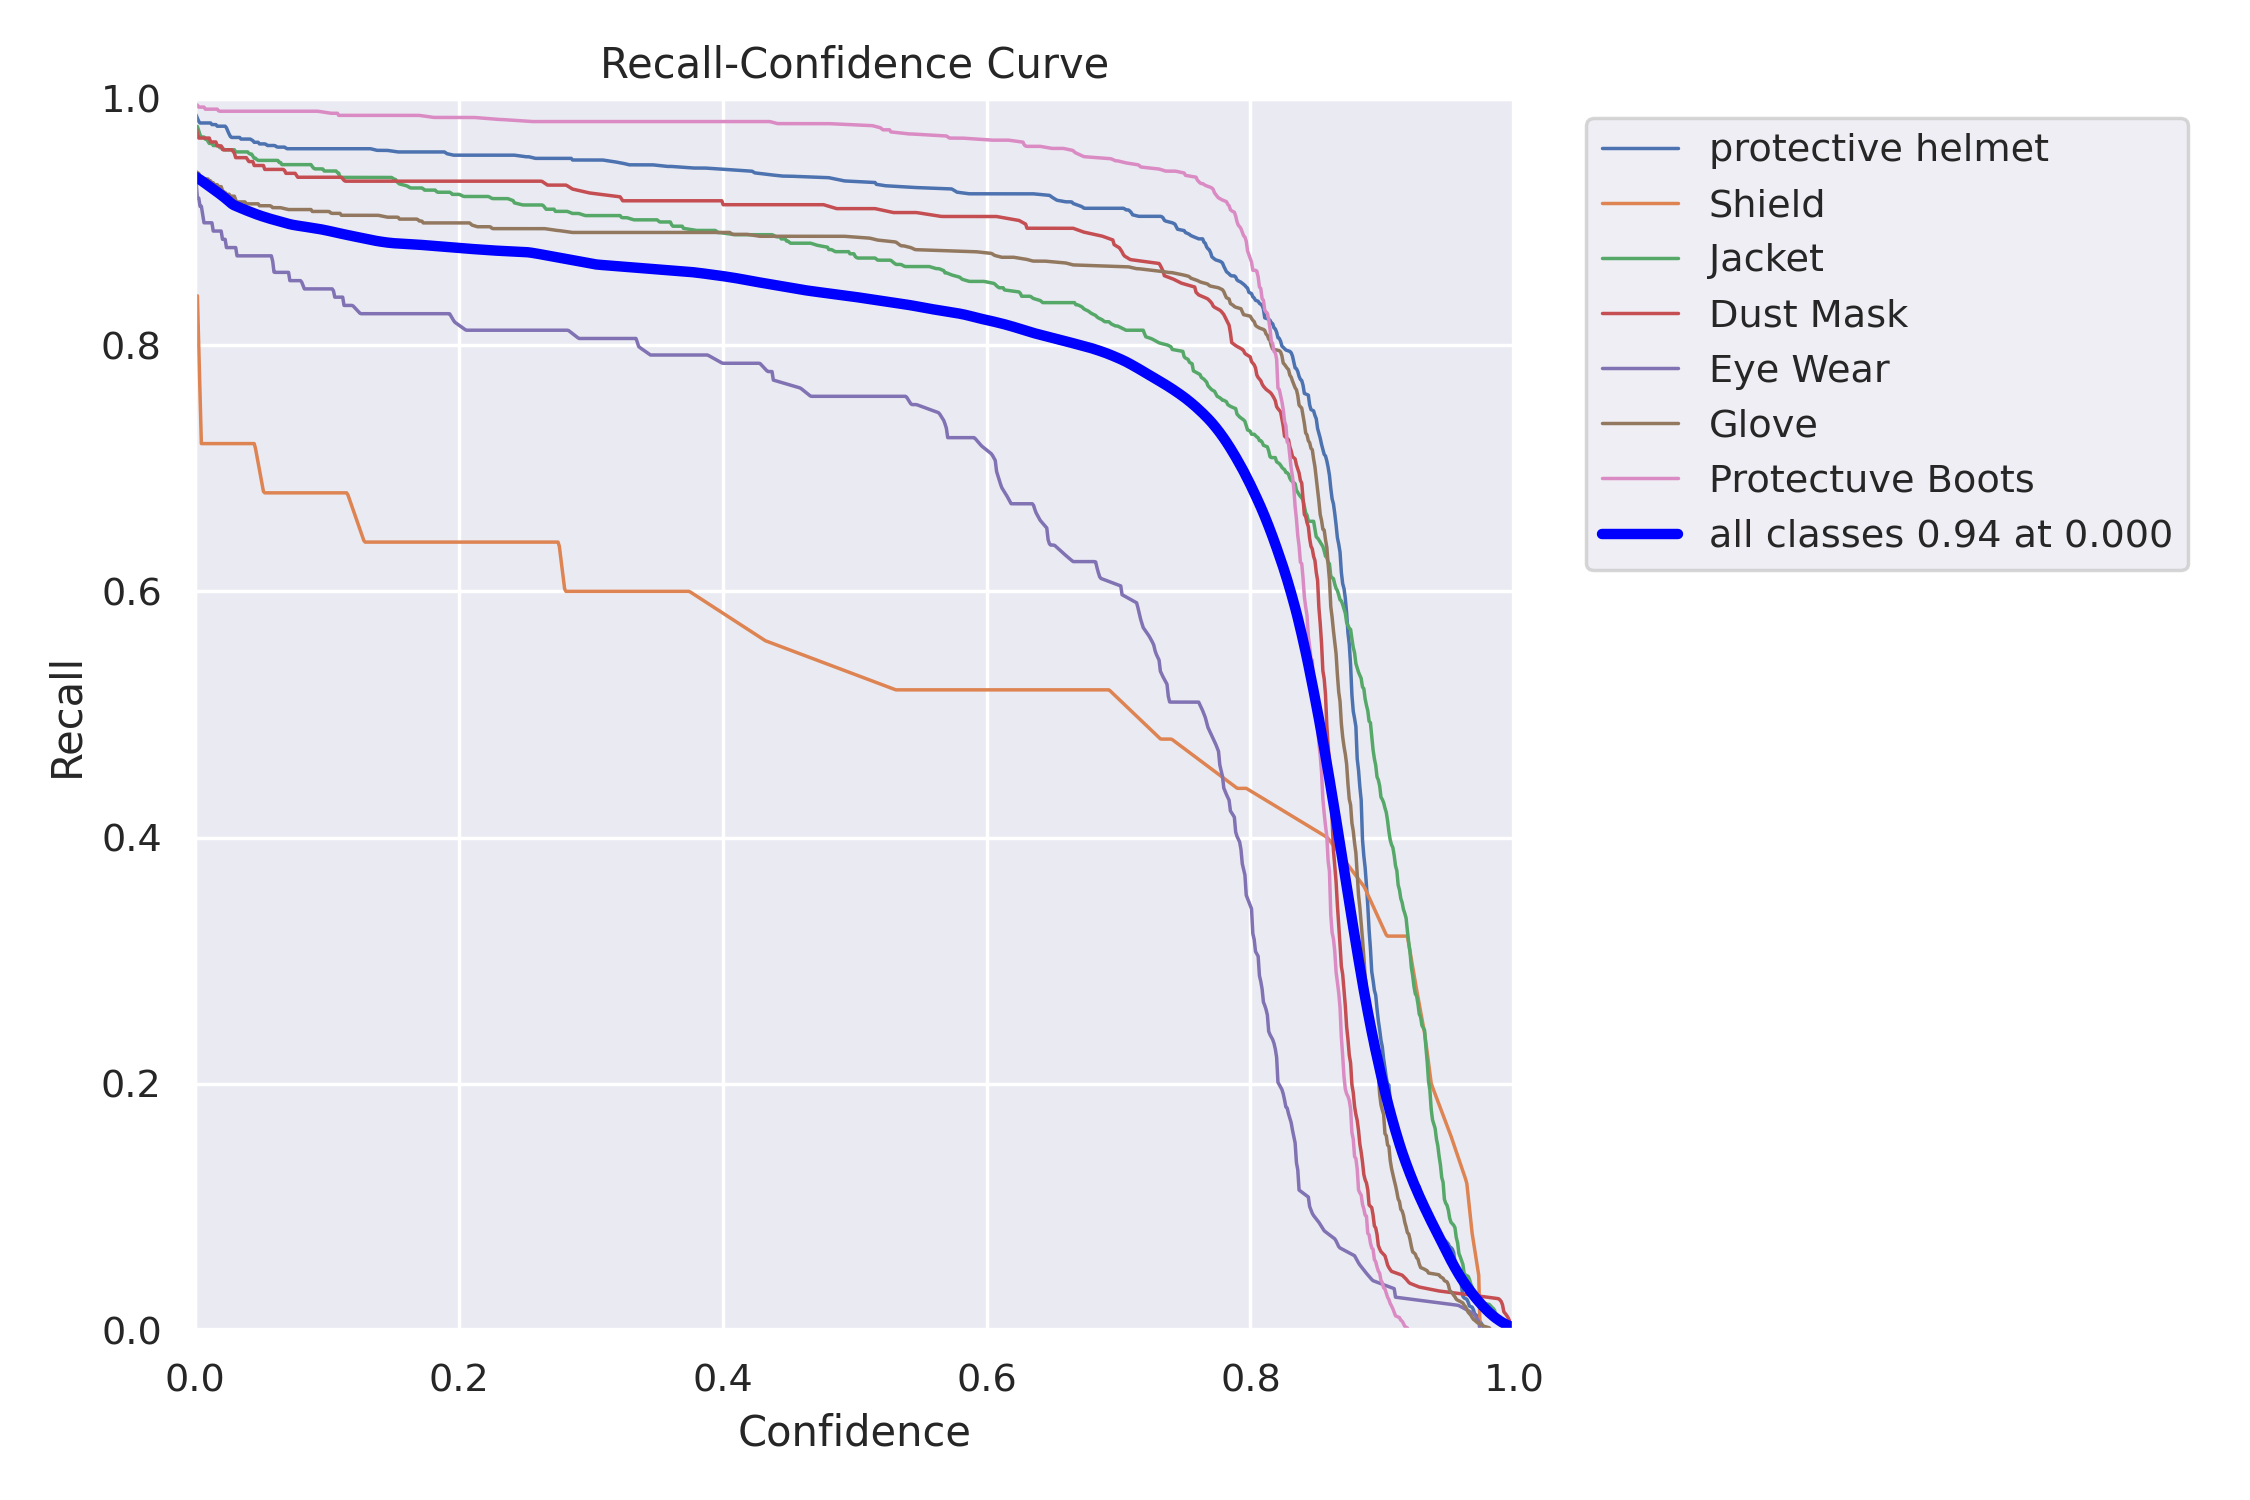

In [46]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/R_curve.png',width=600)

/content


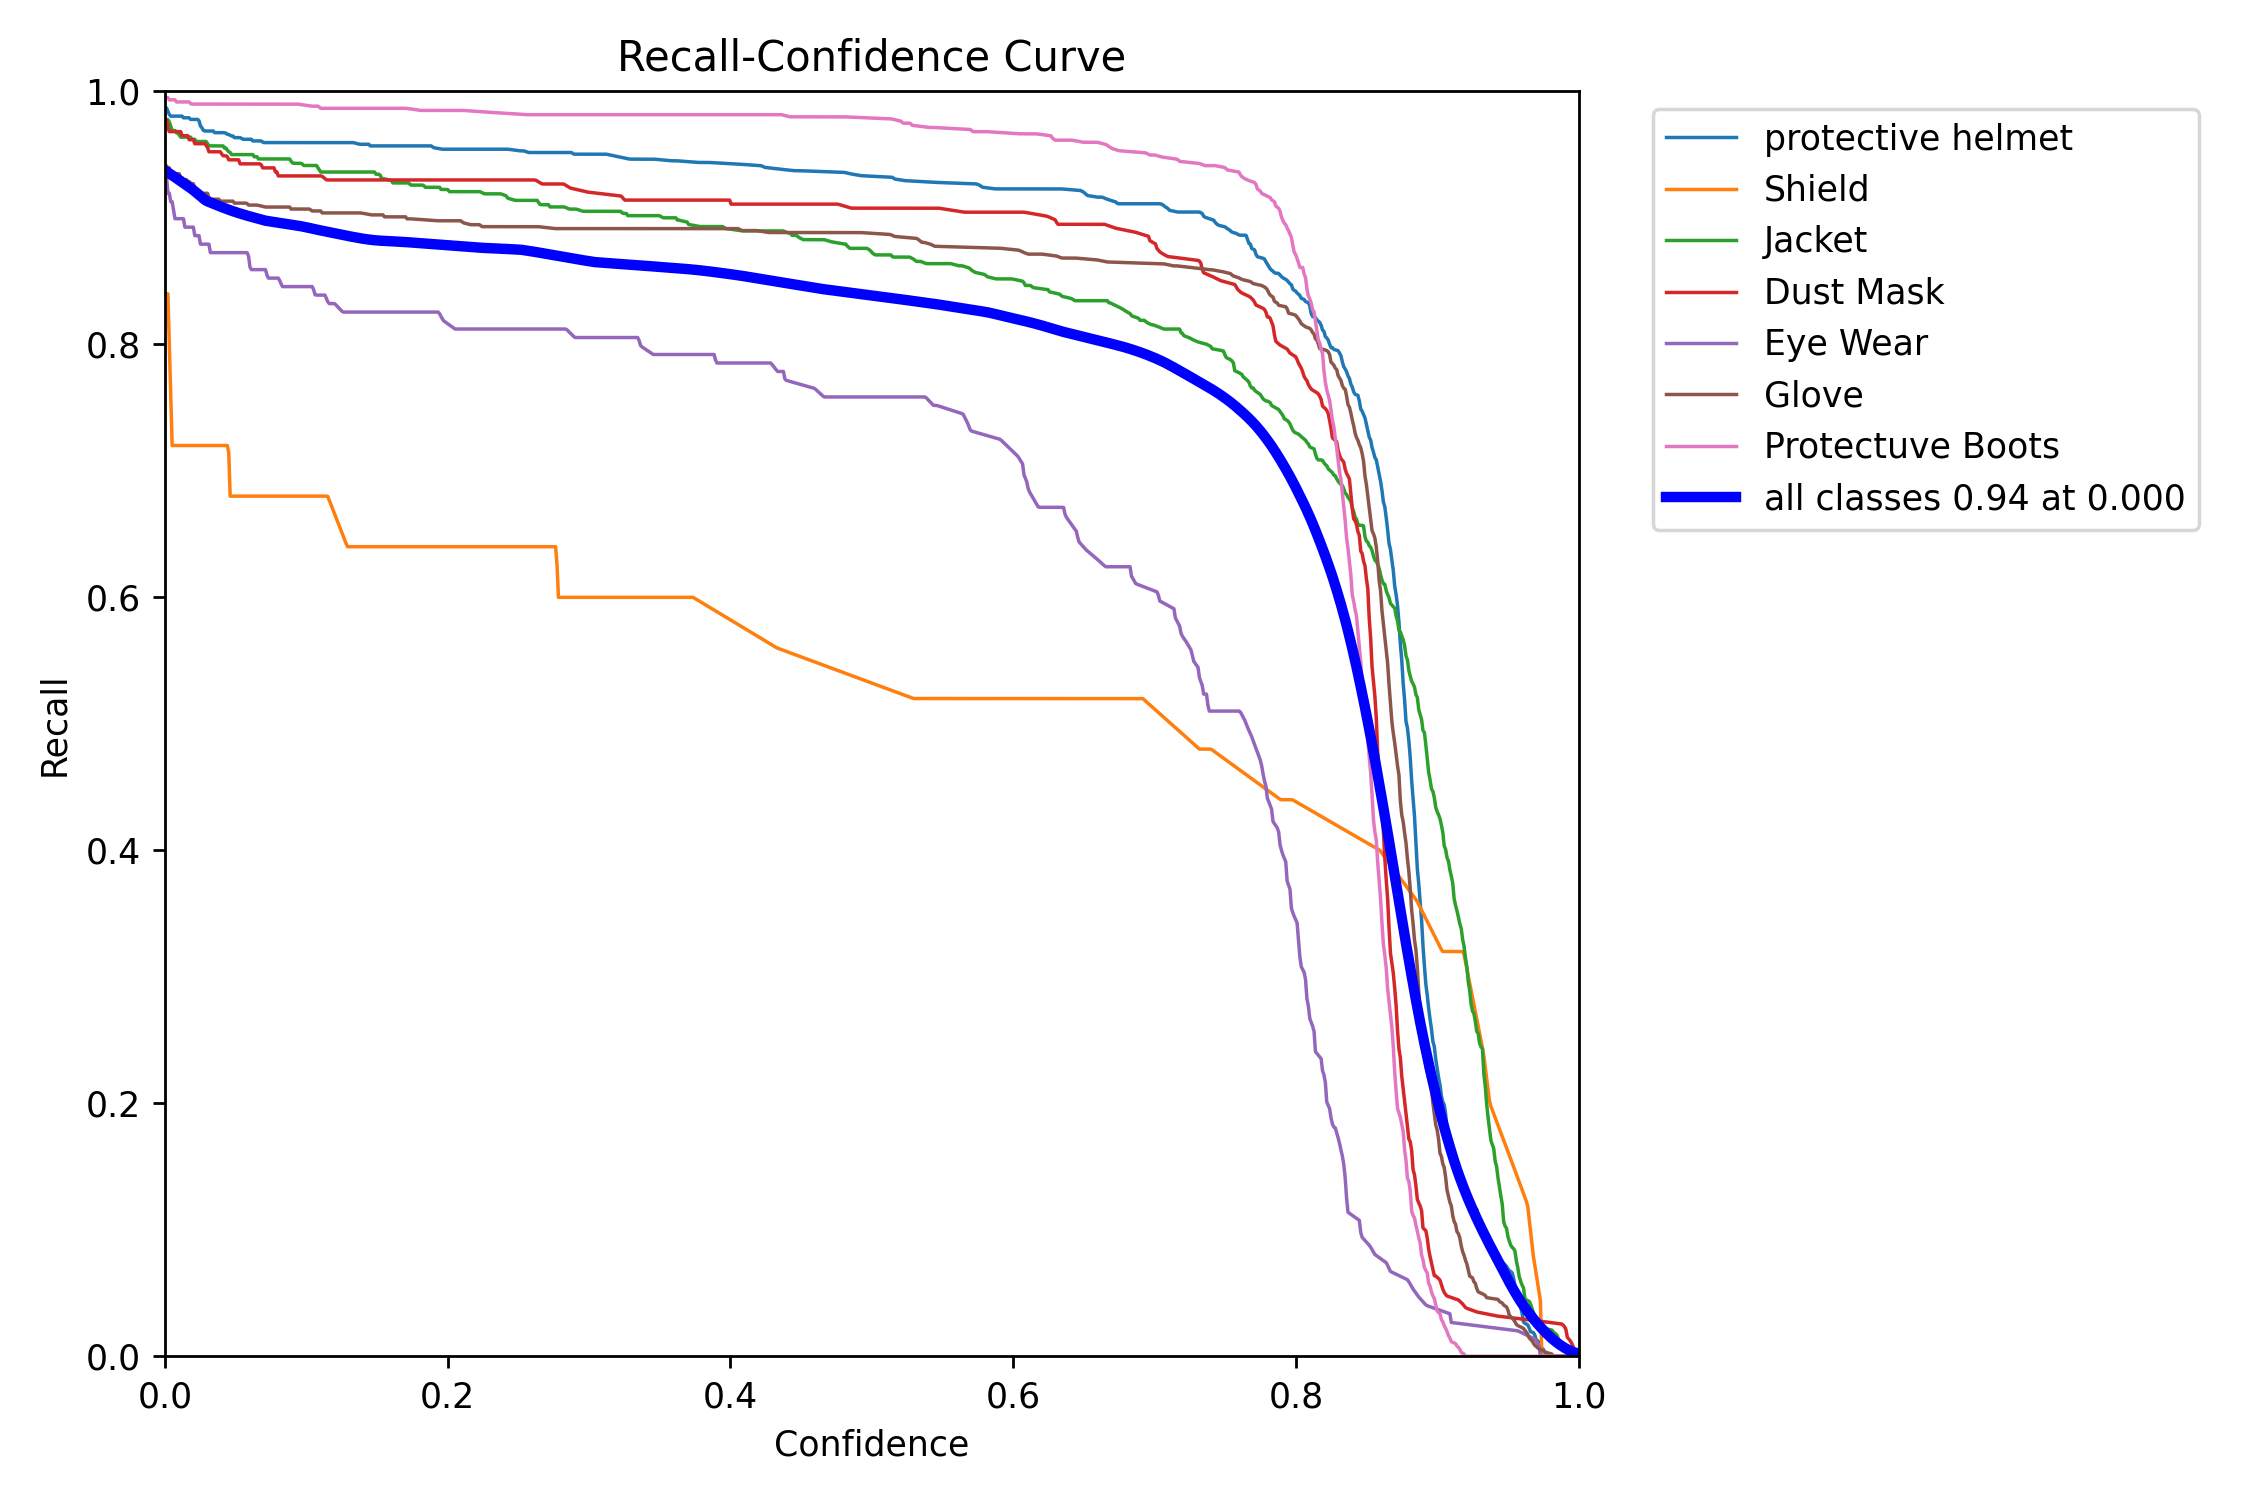

In [47]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/R_curve.png',width=600)

/content


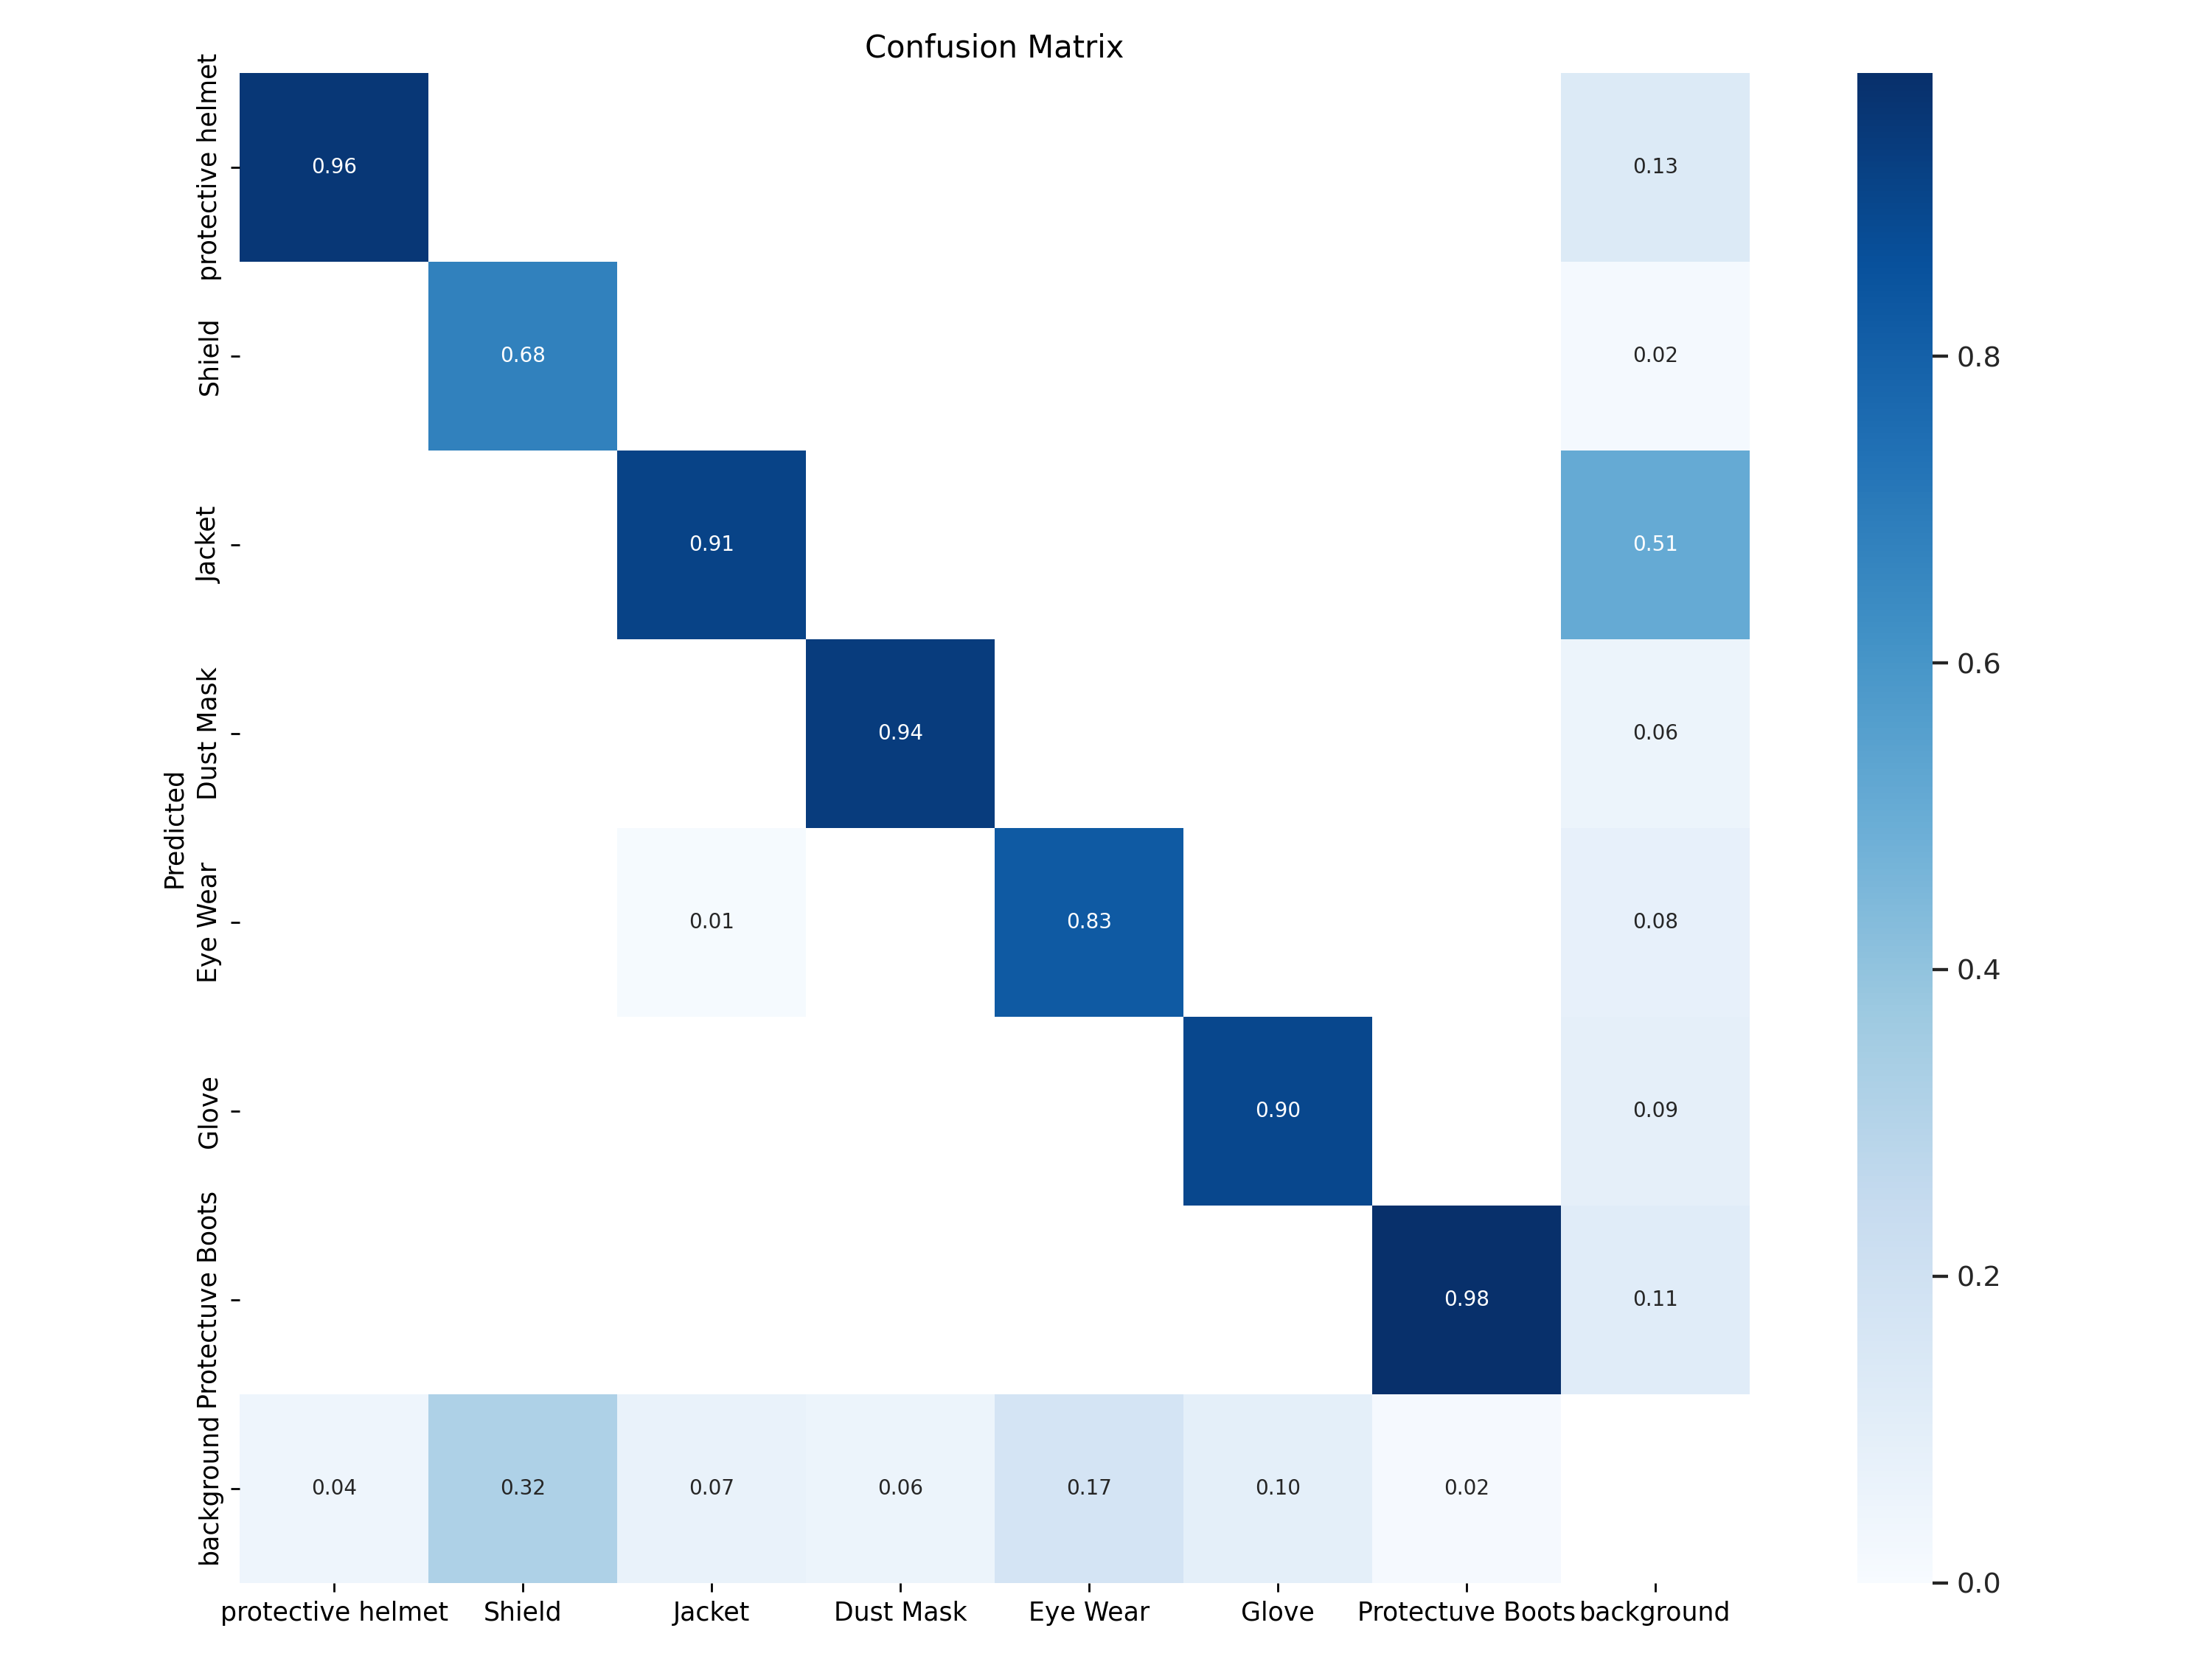

In [49]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png',width=600)

In [66]:
pip install onnx


In [67]:
!mkdir -p /content/models


In [74]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=onnx



WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (49.6 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: export success ✅ 2.6s, saved as '/content/runs/detect/train/weights/best.onnx' (98.8 MB)

Export complete (7.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/cont

In [76]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Export the model to ONNX and save it to a specific directory
export_path = '/content/models'
!mkdir -p $export_path
model.export(format='onnx', path=export_path)

# List the files in the export directory to verify the export
!ls -l $export_path


FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/configs/default.yaml'